In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


n = 8888


data = {
    'Pet Type': np.random.choice(['Dog', 'Cat', 'Rabbit','Turtle','Lizard','chameleon','crocodile','Frog','Gecko','Iguana','Salamander','Snake','Toad','Tortoise','Bird'], n),                                       #0
    'Age': np.random.randint(1, 15, n),                                                              #1
    'Size': np.random.choice(['Small', 'Medium', 'Large'], n),                                       #2
    'Gender': np.random.choice(['Male', 'Female'], n),                                               #3
    'Vaccination Status': np.random.choice(['Vaccinated', 'Not Vaccinated'], n),                     #4
    'Spaying/Neutering Status': np.random.choice(['Spayed/Neutered', 'Not Spayed/Neutered'], n),     #5
    'Behavior': np.random.choice(['Friendly', 'Shy', 'Energetic','Aggressive'], n),                               #6
    'Medical History': np.random.choice(['Healthy', 'Minor Health Issues', 'Chronic Condition'], n), #7
    'Location': np.random.choice(['Shelter', 'Rescue Organization'], n),                             #8
    'Color': np.random.choice(['Brown', 'Black', 'White', 'Spotted', 'Mixed'], n),                   #9
    'Weight (kg)': np.random.uniform(1, 30, n),  # Weight of the pet                                 #10
    'Special Characteristics': np.random.choice(['Playful', 'Calm', 'Loyal', 'Affectionate', 'Active','Aggressive'], n),#11
    'Previous Owners': np.random.randint(0, 3, n),  # Number of previous owners                     #12
    'Diet': np.random.choice(['Dry food', 'Canned Food', 'Mixed diet'], n),                         #13
    'Training Level': np.random.choice(['Basic', 'Advanced', 'None'], n),  # Pet's training level   #14
    'Adoptable': np.random.choice([0, 1], n)  # 0 for Not Adoptable, 1 for Adoptable                #15
}

# Create the DataFrame
df = pd.DataFrame(data)
df



Pet Type  Age    Size  Gender Vaccination Status  \
0     Tortoise    1   Large    Male     Not Vaccinated   
1     Tortoise    3   Large  Female     Not Vaccinated   
2       Turtle   13   Small    Male     Not Vaccinated   
3          Cat    3   Large    Male         Vaccinated   
4       Turtle   11  Medium  Female         Vaccinated   
...        ...  ...     ...     ...                ...   
8883    Lizard    6   Small  Female     Not Vaccinated   
8884    Turtle    2  Medium    Male     Not Vaccinated   
8885  Tortoise    6   Large    Male     Not Vaccinated   
8886      Toad    4   Small    Male     Not Vaccinated   
8887       Cat    6  Medium  Female         Vaccinated   

     Spaying/Neutering Status    Behavior      Medical History  \
0         Not Spayed/Neutered         Shy              Healthy   
1             Spayed/Neutered         Shy    Chronic Condition   
2             Spayed/Neutered  Aggressive    Chronic Condition   
3             Spayed/Neutered   Energetic              Healthy   
4         Not Spayed/Neutered  Aggressive  Minor Health Issues   
...                       ...         ...                  ...   
8883          Spayed/Neutered         Shy  Minor Health Issues   
8884      Not Spayed/Neutered         Shy              Healthy   
8885          Spayed/Neutered  Aggressive  Minor Health Issues   
8886      Not Spayed/Neutered    Friendly  Minor Health Issues   
8887      Not Spayed/Neutered   Energetic  Minor Health Issues   

                 Location    Color  Weight (kg) Special Characteristics  \
0                 Shelter    Black    21.477954                   Loyal   
1                 Shelter    Black    12.938102                  Active   
2                 Shelter    Brown     8.370243                  Active   
3     Rescue Organization    Mixed    27.525128            Affectionate   
4     Rescue Organization    Black    21.419542              Aggressive   
...                   ...      ...          ...                     ...   
8883  Rescue Organization  Spotted    27.947392              Aggressive   
8884              Shelter    White    22.052847                    Calm   
8885  Rescue Organization    Mixed    21.058905                 Playful   
8886  Rescue Organization    Black     8.658895                    Calm   
8887              Shelter    Mixed    20.770707              Aggressive   

      Previous Owners         Diet Training Level  Adoptable  
0                   2     Dry food           None          0  
1                   2     Dry food          Basic          1  
2                   1  Canned Food          Basic          0  
3                   2  Canned Food       Advanced          0  
4                   1     Dry food       Advanced          0  
...               ...          ...            ...        ...  
8883                1  Canned Food           None          1  
8884                2   Mixed diet          Basic          0  
8885                0  Canned Food          Basic          1  
8886                0  Canned Food          Basic          0  
8887                0     Dry food           None          0  

[8888 rows x 16 columns]

In [45]:
import random
random_ages = [random.randint(1, 20) if pet_type == 'Dog' else age for pet_type, age in zip(df['Pet Type'], df['Age'])]
df['Age'] = random_ages

random_agess = [random.randint(1, 20) if pet_type == 'Cat' else age for pet_type, age in zip(df['Pet Type'], df['Age'])]
df['Age'] = random_agess

random_ages1 = [random.randint(1, 100) if pet_type == 'Turtle' else age for pet_type, age in zip(df['Pet Type'], df['Age'])]
df['Age'] = random_ages1
random_ages2 = [random.randint(1, 100) if pet_type == 'Tortoise' else age for pet_type, age in zip(df['Pet Type'], df['Age'])]
df['Age'] = random_ages2
df['Weight (kg)'] = df['Weight (kg)'].astype(int)
pet_types = ['Dog', 'Cat', 'Rabbit', 'Turtle', 'Tortoise']
df.loc[df['Pet Type'].isin(pet_types), 'Behavior'] = 'Friendly'
df.loc[df['Pet Type'].isin(pet_types), 'Special Characteristics'] = 'Playful'
df.loc[(df['Vaccination Status'] == 'Not Vaccinated') | (df['Medical History'] == 'Not Healthy') | (df['Special Characteristics'] == 'Aggressive') | (df['Behavior'] == 'Aggressive'), 'Adoptable'] = 0

def set_values_for_crocodile_and_snake(row):
    if row['Pet Type'] in ['Crocodile', 'Snake']:
        row['Training Level'] = 'None'
        row['Location'] = 'Rescue Organization'
        row['Behavior'] = 'Energetic'
        row['Color'] = 'Mixed'
        row['Special Characteristics'] = 'Aggressive'
        row['Diet'] = 'Mixed diet'
        row['Adoptable']=0
    return row

# Apply the function to update values for Crocodile and Snake in the existing DataFrame
df = df.apply(set_values_for_crocodile_and_snake, axis=1)

def set_values_for_specific_pet_types(row):
    if row['Pet Type'] in ['Turtle', 'Tortoise', 'chameleon', 'Salamander','Lizard']:
        row['Training Level'] = 'Basic'
        row['Location'] = 'Shelter'
        row['Behavior'] = 'Energetic'
        row['Color'] = 'Mixed'
        row['Special Characteristics'] = 'Playful'
        row['Diet'] = 'Mixed diet'
        row['Adoptable'] = 1
    return row

# Apply the function to update values for specific pet types in the existing DataFrame
df = df.apply(set_values_for_specific_pet_types, axis=1)

def set_values_for_rabbitandbird_pet_types(row):
    if row['Pet Type'] in ['Rabbit','Bird']:
        row['Training Level'] = 'Basic'
        row['Location'] = 'Shelter'
        row['Behavior'] = 'Shy'
        row['Color'] = 'Mixed'
        row['Special Characteristics'] = 'Playful'
        row['Diet'] = 'Mixed diet'
        row['Adoptable'] = 1
    return row

df = df.apply(set_values_for_rabbitandbird_pet_types, axis=1)


def set_random_age(row):
    if row['Pet Type'] == 'Lizard':
        if row['Size'] == 'Small':
            return random.randint(1, 5)
        elif row['Size'] == 'Medium':
            return random.randint(1, 10)
        elif row['Size'] == 'Large':
            return random.randint(1, 20)
    return row['Age']

# Apply the function to update ages based on size
df['Age'] = df.apply(set_random_age, axis=1)



def set_random_age12(row):
    if row['Pet Type'] == 'chameleon':
        return random.randint(1, 5)
    return row['Age']

# Apply the function to update ages for 'Chameleon'
df['Age'] = df.apply(set_random_age12, axis=1)


def set_random_age13(row):
    if row['Pet Type'] == 'Frog':
        return random.randint(2, 15)
    return row['Age']

# Apply the function to update ages for 'Frog'
df['Age'] = df.apply(set_random_age13, axis=1)


def set_random_agege(row):
    if row['Pet Type'] == 'Gecko':
        return random.randint(1, 20)
    return row['Age']

# Apply the function to update ages for 'Gecko'
df['Age'] = df.apply(set_random_agege, axis=1)

def set_random_ageigu(row):
    if row['Pet Type'] == 'Iguana':
        return random.randint(1, 20)
    return row['Age']

# Apply the function to update ages for 'Iguana'
df['Age'] = df.apply(set_random_ageigu, axis=1)


def set_random_agesalama(row):
    if row['Pet Type'] == 'Salamander':
        if row['Size'] == 'Small':
            return random.randint(1, 3)
        elif row['Size'] == 'Medium':
            return random.randint(1, 7)
        elif row['Size'] == 'Large':
            return random.randint(1, 10)
    return row['Age']

# Apply the function to update ages based on size
df['Age'] = df.apply(set_random_agesalama, axis=1)

def set_random_agesnake(row):
    if row['Pet Type'] == 'Snake':
        if row['Size'] == 'Small':
            return random.randint(1, 5)
        elif row['Size'] == 'Medium':
            return random.randint(1, 15)
        elif row['Size'] == 'Large':
            return random.randint(1, 20)
    return row['Age']

# Apply the function to update ages based on size
df['Age'] = df.apply(set_random_agesnake, axis=1)


def set_random_agetoad(row):
    if row['Pet Type'] == 'Toad':
        if row['Size'] == 'Small':
            return random.randint(1, 3)
        elif row['Size'] == 'Medium':
            return random.randint(1, 7)
        elif row['Size'] == 'Large':
            return random.randint(1, 15)
    return row['Age']

# Apply the function to update ages based on size
df['Age'] = df.apply(set_random_agetoad, axis=1)

def set_random_agebird(row):
    if row['Pet Type'] == 'Bird':
        if row['Size'] == 'Small':
            return random.randint(1, 3)
        elif row['Size'] == 'Medium':
            return random.randint(1, 7)
        elif row['Size'] == 'Large':
            return random.randint(1, 15)
    return row['Age']

# Apply the function to update ages based on size
df['Age'] = df.apply(set_random_agebird, axis=1)


def update_location_and_adoptabilitydogcat(row):
    if row['Pet Type'] in ['Dog', 'Cat']:
        row['Location'] = 'Shelter'
        if row['Age'] > 10:
            row['Adoptable'] = 0
        else :
            row['Adoptable'] = 1
    return row

# Apply the function to update location and adoptability in the existing DataFrame
df = df.apply(update_location_and_adoptabilitydogcat, axis=1)

def update_adoptabilitymedical(row):
    if  row['Medical History'] == 'Chronic Condition':
        row['Adoptable'] = 0
    return row

# Apply the function to update adoptability in the existing DataFrame
df = df.apply(update_adoptabilitymedical, axis=1)

dog_df = df[df['Pet Type'] == 'Dog']
dog_df
min_age = dog_df['Age'].min()
max_age = dog_df['Age'].max()
print(f"Minimum Age for Dogs: {min_age}")
print(f"Maximum Age for Dogs: {max_age}")
cat_df = df[df['Pet Type'] == 'Cat']

min_age = cat_df['Age'].min()
max_age = cat_df['Age'].max()
print(f"Minimum Age for Cats: {min_age}")
print(f"Maximum Age for Cats: {max_age}")
Turtle_df = df[df['Pet Type'] == 'Turtle']

min_age = Turtle_df['Age'].min()
max_age = Turtle_df['Age'].max()
print(f"Minimum Age for Turtles: {min_age}")
print(f"Maximum Age for Turtles: {max_age}")

Tortoise_df = df[df['Pet Type'] == 'Tortoise']

min_age = Tortoise_df['Age'].min()
max_age = Tortoise_df['Age'].max()
print(f"Minimum Age for Tortoises: {min_age}")
print(f"Maximum Age for Tortoises: {max_age}")

chameleon_df = df[df['Pet Type'] == 'chameleon']

# Find the minimum and maximum ages of Chameleons
min_age_chameleon = chameleon_df['Age'].min()
max_age_chameleon = chameleon_df['Age'].max()

# Display the results
print("Minimum Age (Chameleon):", min_age_chameleon)
print("Maximum Age (Chameleon):", max_age_chameleon)


frog_df = df[df['Pet Type'] == 'Frog']

# Find the minimum and maximum ages of Frog
min_age_Frog = frog_df['Age'].min()
max_age_Frog = frog_df['Age'].max()

# Display the results
print("Minimum Age (Frog):", min_age_Frog)
print("Maximum Age (Frog)):", max_age_Frog)



Gecko_df = df[df['Pet Type'] == 'Gecko']

# Find the minimum and maximum ages of Chameleons
min_age_Gecko = Gecko_df['Age'].min()
max_age_Gecko = Gecko_df['Age'].max()

# Display the results
print("Minimum Age (Gecko):", min_age_Gecko)
print("Maximum Age (Gecko):", max_age_Gecko)


Iguana_df = df[df['Pet Type'] == 'Iguana']

# Find the minimum and maximum ages of Iguanaleons
min_age_Iguana = Iguana_df['Age'].min()
max_age_Iguana = Iguana_df['Age'].max()

# Display the results
print("Minimum Age (Iguana):", min_age_Iguana)
print("Maximum Age (Iguana):", max_age_Iguana)
# Define the mapping from pet types to numeric values
pet_type_mapping = {'Dog': 0, 'Cat': 1, 'Rabbit': 2,'Turtle':3,'Lizard':4,'chameleon':4,'crocodile':5,'Frog':6,'Gecko':7,'Iguana':8,'Salamander':9,'Snake':10,'Toad':11,'Tortoise':12,'Bird':13}

# Map the values in the 'Pet Type' column
df['Pet Type'] = df['Pet Type'].map(pet_type_mapping)
size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2}

# Map the values in the 'Size' column
df['Size'] = df['Size'].map(size_mapping)

# Define the mapping from gender categories to numeric values
gender_mapping = {'Male': 1, 'Female': 0}

# Map the values in the 'Gender' column
df['Gender'] = df['Gender'].map(gender_mapping)
vaccination_mapping = {'Vaccinated': 0, 'Not Vaccinated': 1}

# Map the values in the 'Vaccination Status' column
df['Vaccination Status'] = df['Vaccination Status'].map(vaccination_mapping)
# Define the mapping from spaying/neutering status categories to numeric values
spaying_mapping = {'Spayed/Neutered': 0, 'Not Spayed/Neutered': 1}

# Map the values in the 'Spaying/Neutering Status' column
df['Spaying/Neutering Status'] = df['Spaying/Neutering Status'].map(spaying_mapping)

# Define the mapping from behavior categories to numeric values
behavior_mapping = {'Friendly': 0, 'Shy': 1, 'Energetic': 2,'Aggressive':3}

# Map the values in the 'Behavior' column
df['Behavior'] = df['Behavior'].map(behavior_mapping)
# Define the mapping from medical history categories to numeric values
medical_history_mapping = {'Healthy': 0, 'Minor Health Issues': 1, 'Chronic Condition': 2}

# Map the values in the 'Medical History' column
df['Medical History'] = df['Medical History'].map(medical_history_mapping)

# Define the mapping from location categories to numeric values
location_mapping = {'Shelter': 0, 'Rescue Organization': 1}

# Map the values in the 'Location' column
df['Location'] = df['Location'].map(location_mapping)
# Define the mapping from location categories to numeric values
color_mapping = {'Brown':0, 'Black':1, 'White':2, 'Spotted':3, 'Mixed':4}


# Map the values in the 'Location' column
df['Color'] = df['Color'].map(color_mapping)
# Define the mapping from location categories to numeric values
specialcharecter_mapping = {'Playful':0, 'Calm':1, 'Loyal':2, 'Affectionate':3, 'Active':4, 'Aggressive':5}


# Map the values in the 'Location' column
df['Special Characteristics'] = df['Special Characteristics'].map(specialcharecter_mapping)
# Define the mapping from location categories to numeric values
training_mapping = {'Basic':0, 'Advanced':1, 'None':2}


# Map the values in the 'Location' column
df['Training Level'] = df['Training Level'].map(training_mapping)
# df['Diet'] = np.random.randint(3, size=len(df))
diet_mapping = {
    'Dry food': 0,
    'Canned Food': 1,
    'Mixed diet': 2,
    
}

df['Diet'] = df['Diet'].map(diet_mapping)

Minimum Age for Dogs: 1
Maximum Age for Dogs: 20
Minimum Age for Cats: 1
Maximum Age for Cats: 20
Minimum Age for Turtles: 1
Maximum Age for Turtles: 100
Minimum Age for Tortoises: 1
Maximum Age for Tortoises: 100
Minimum Age (Chameleon): 1
Maximum Age (Chameleon): 5
Minimum Age (Frog): 2
Maximum Age (Frog)): 15
Minimum Age (Gecko): 1
Maximum Age (Gecko): 20
Minimum Age (Iguana): 1
Maximum Age (Iguana): 20


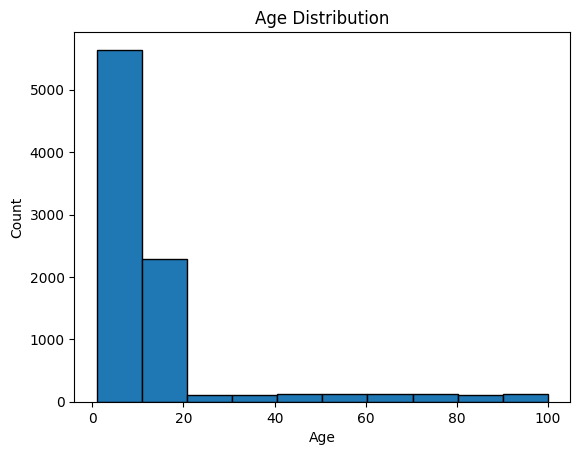

In [46]:
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=10, edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


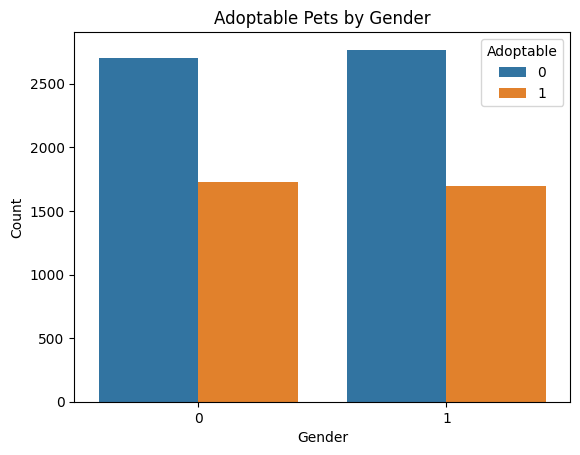

In [47]:
import seaborn as sns

sns.countplot(data=df, x='Gender', hue='Adoptable')
plt.title('Adoptable Pets by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


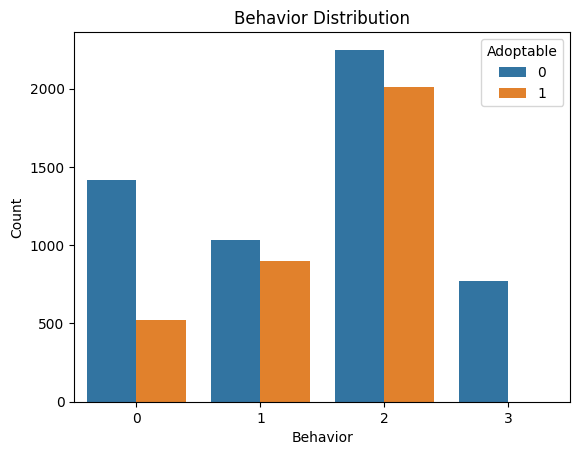

In [48]:
import seaborn as sns

sns.countplot(data=df, x='Behavior', hue='Adoptable')
plt.title('Behavior Distribution')
plt.xlabel('Behavior')
plt.ylabel('Count')
plt.show()


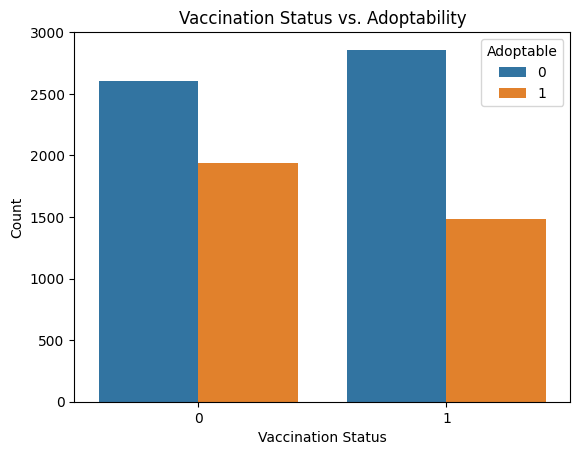

In [49]:
import seaborn as sns

sns.countplot(data=df, x='Vaccination Status', hue='Adoptable')
plt.title('Vaccination Status vs. Adoptability')
plt.xlabel('Vaccination Status')
plt.ylabel('Count')
plt.show()


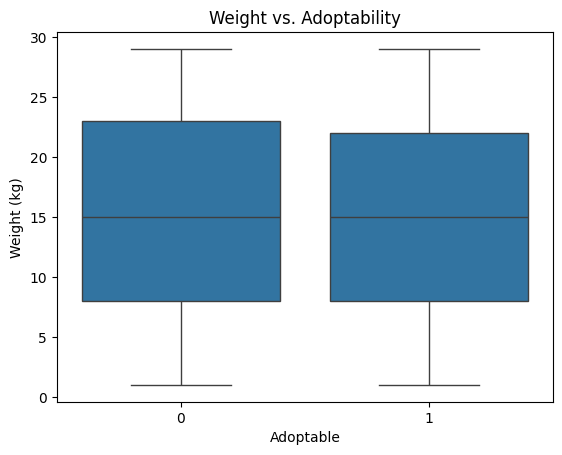

In [50]:
import seaborn as sns

sns.boxplot(data=df, x='Adoptable', y='Weight (kg)')
plt.title('Weight vs. Adoptability')
plt.xlabel('Adoptable')
plt.ylabel('Weight (kg)')
plt.show()


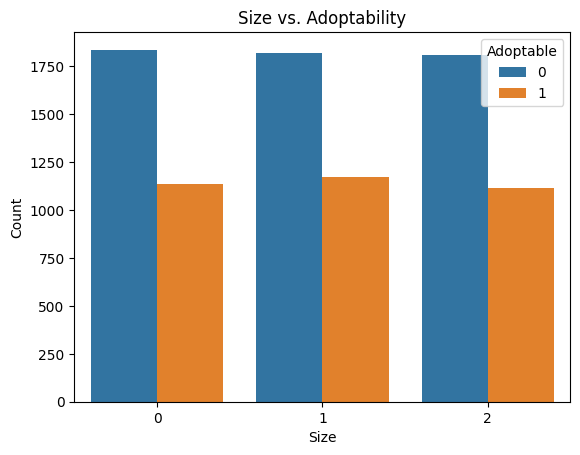

In [51]:
import seaborn as sns

sns.countplot(data=df, x='Size', hue='Adoptable')
plt.title('Size vs. Adoptability')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()


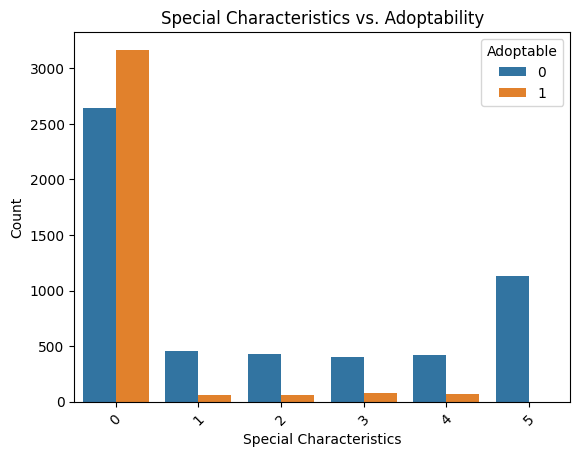

In [52]:
import seaborn as sns

sns.countplot(data=df, x='Special Characteristics', hue='Adoptable')
plt.title('Special Characteristics vs. Adoptability')
plt.xlabel('Special Characteristics')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


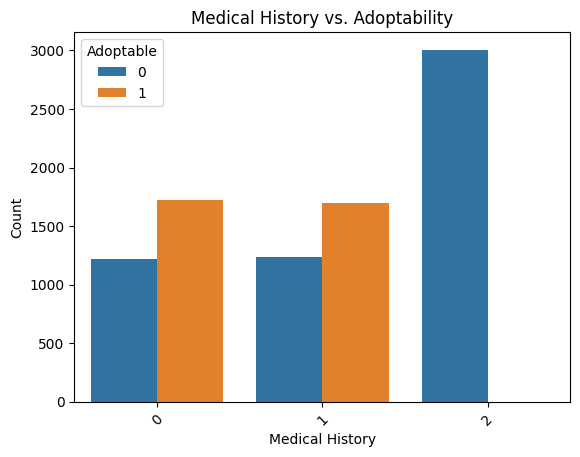

In [53]:
import seaborn as sns

sns.countplot(data=df, x='Medical History', hue='Adoptable')
plt.title('Medical History vs. Adoptability')
plt.xlabel('Medical History')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


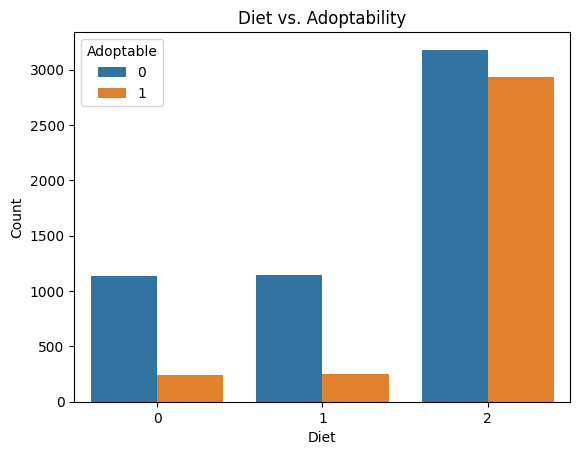

In [54]:
import seaborn as sns

sns.countplot(data=df, x='Diet', hue='Adoptable')
plt.title('Diet vs. Adoptability')
plt.xlabel('Diet')
plt.ylabel('Count')
plt.show()


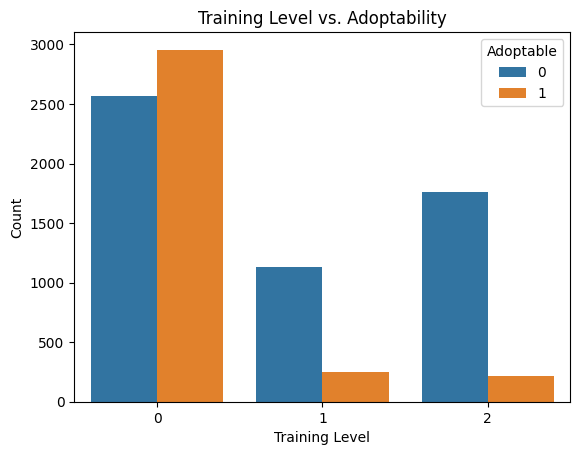

In [55]:
import seaborn as sns

sns.countplot(data=df, x='Training Level', hue='Adoptable')
plt.title('Training Level vs. Adoptability')
plt.xlabel('Training Level')
plt.ylabel('Count')
plt.show()


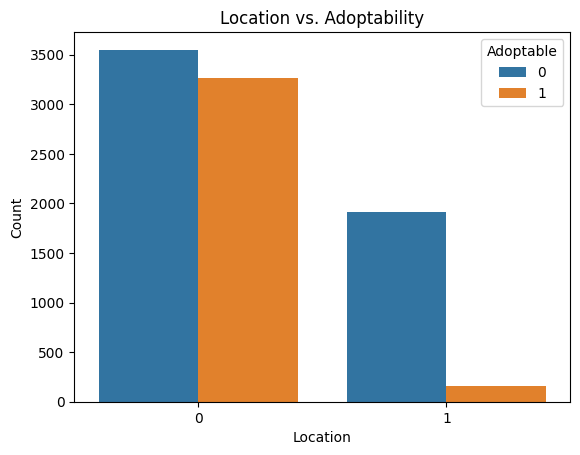

In [56]:
import seaborn as sns

sns.countplot(data=df, x='Location', hue='Adoptable')
plt.title('Location vs. Adoptability')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()


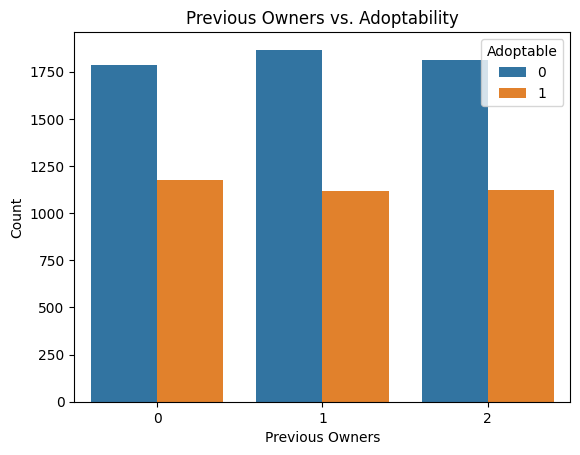

In [57]:
import seaborn as sns

sns.countplot(data=df, x='Previous Owners', hue='Adoptable')
plt.title('Previous Owners vs. Adoptability')
plt.xlabel('Previous Owners')
plt.ylabel('Count')
plt.show()


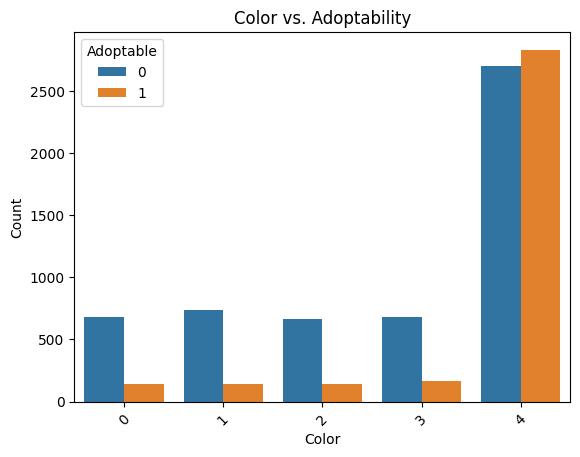

In [58]:
import seaborn as sns

sns.countplot(data=df, x='Color', hue='Adoptable')
plt.title('Color vs. Adoptability')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


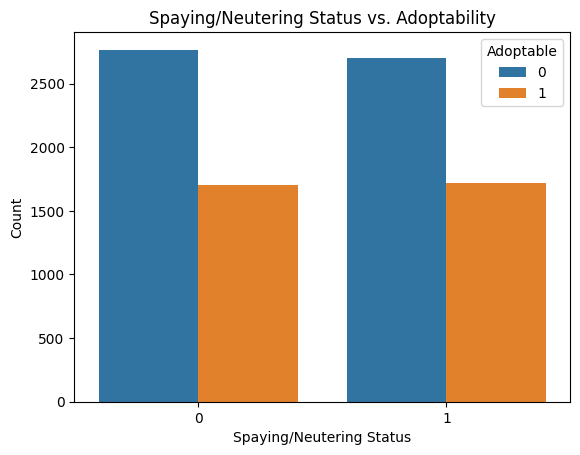

In [59]:
import seaborn as sns

sns.countplot(data=df, x='Spaying/Neutering Status', hue='Adoptable')
plt.title('Spaying/Neutering Status vs. Adoptability')
plt.xlabel('Spaying/Neutering Status')
plt.ylabel('Count')
plt.show()


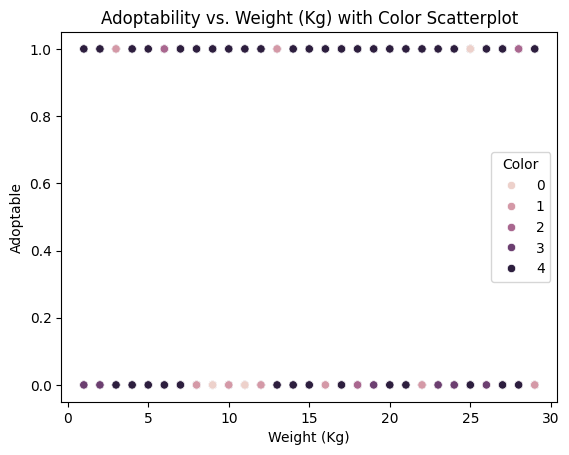

In [60]:
import seaborn as sns

sns.scatterplot(data=df, x='Weight (kg)', y='Adoptable', hue='Color')
plt.title('Adoptability vs. Weight (Kg) with Color Scatterplot')
plt.xlabel('Weight (Kg)')
plt.ylabel('Adoptable')
plt.show()


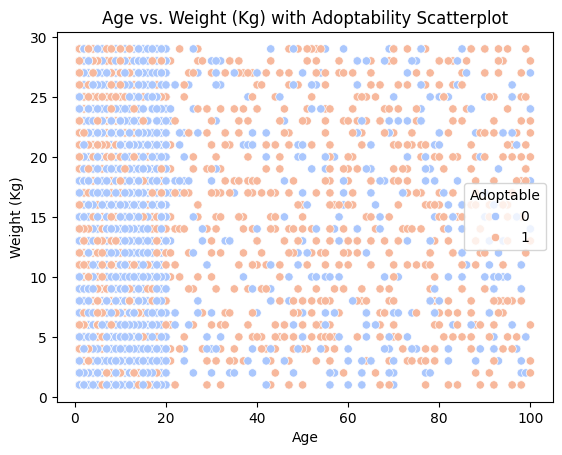

In [61]:
import seaborn as sns

sns.scatterplot(data=df, x='Age', y='Weight (kg)', hue='Adoptable', palette='coolwarm')
plt.title('Age vs. Weight (Kg) with Adoptability Scatterplot')
plt.xlabel('Age')
plt.ylabel('Weight (Kg)')
plt.show()


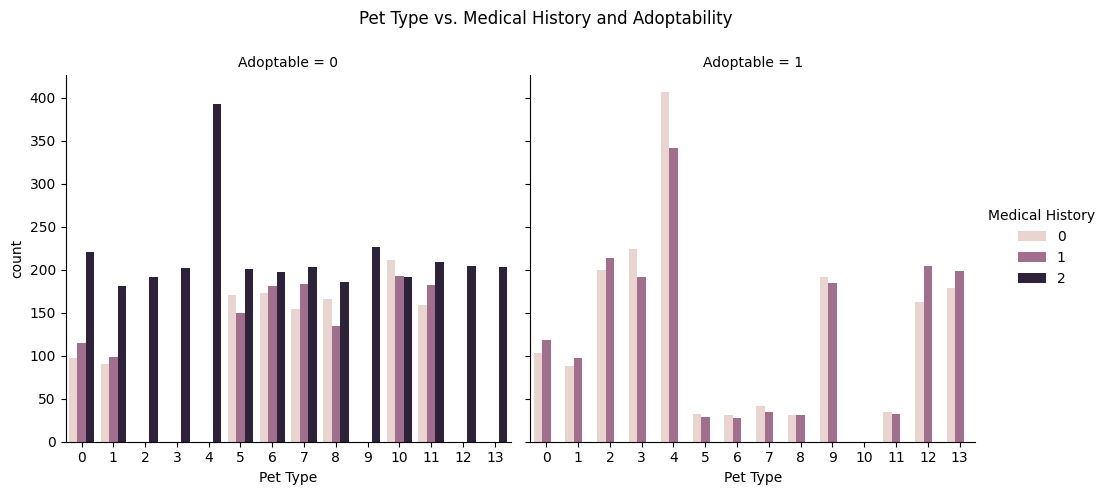

In [62]:
import seaborn as sns

sns.catplot(data=df, x='Pet Type', hue='Medical History', col='Adoptable', kind='count')
plt.subplots_adjust(top=0.85)
plt.suptitle('Pet Type vs. Medical History and Adoptability')
plt.show()


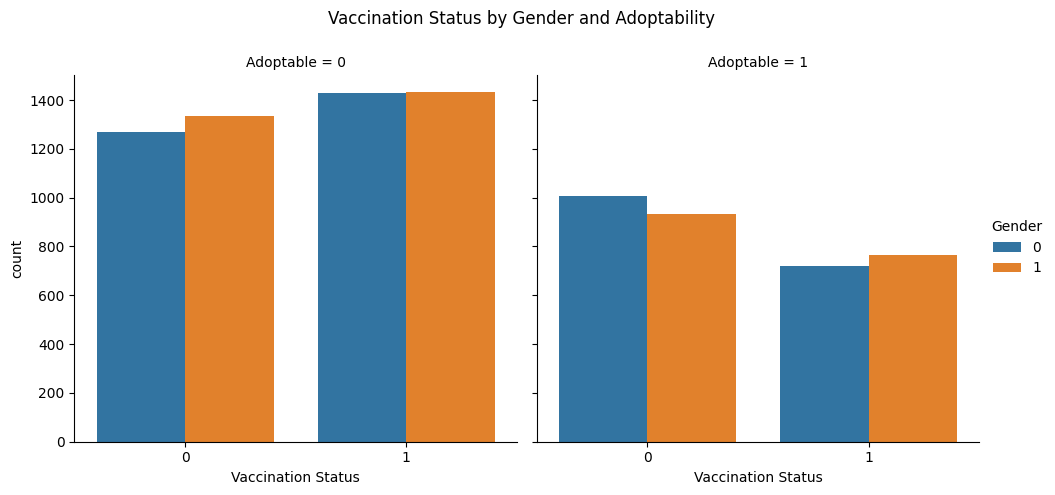

In [63]:
import seaborn as sns

sns.catplot(data=df, x='Vaccination Status', hue='Gender', col='Adoptable', kind='count')
plt.subplots_adjust(top=0.85)
plt.suptitle('Vaccination Status by Gender and Adoptability')
plt.show()


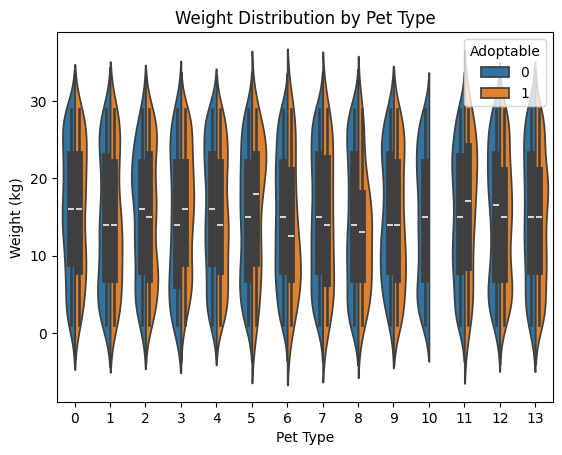

In [64]:
import seaborn as sns

sns.violinplot(data=df, x='Pet Type', y='Weight (kg)', hue='Adoptable', split=True)
plt.title('Weight Distribution by Pet Type')
plt.xlabel('Pet Type')
plt.ylabel('Weight (kg)')
plt.show()


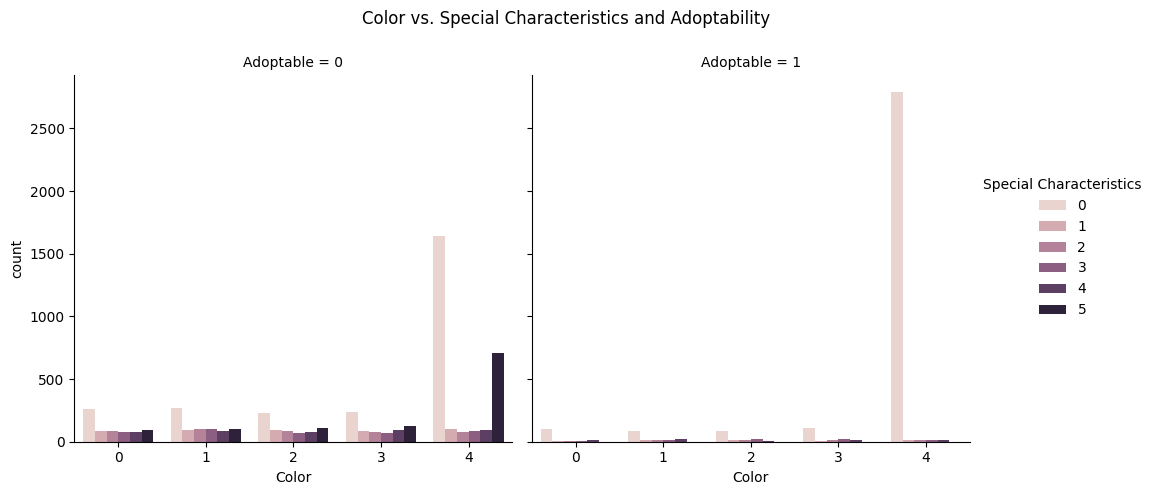

In [65]:
import seaborn as sns

sns.catplot(data=df, x='Color', hue='Special Characteristics', col='Adoptable', kind='count')
plt.subplots_adjust(top=0.85)
plt.suptitle('Color vs. Special Characteristics and Adoptability')
plt.show()


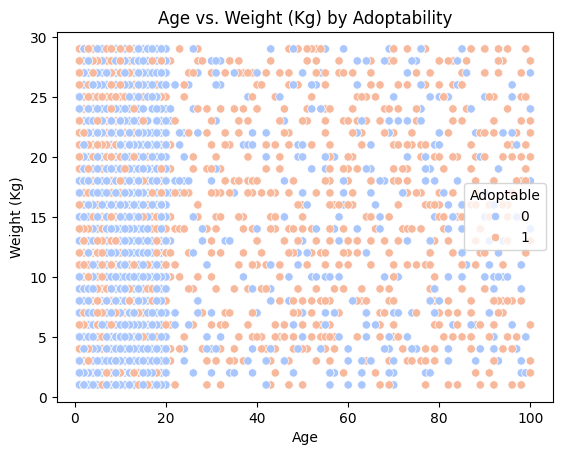

In [66]:
import seaborn as sns

sns.scatterplot(data=df, x='Age', y='Weight (kg)', hue='Adoptable', palette='coolwarm')
plt.title('Age vs. Weight (Kg) by Adoptability')
plt.xlabel('Age')
plt.ylabel('Weight (Kg)')
plt.show()


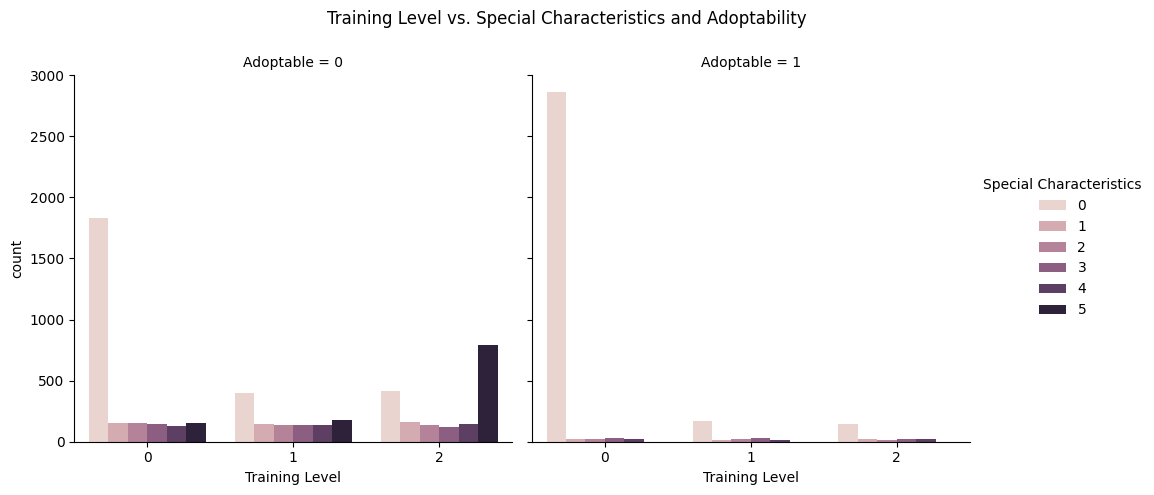

In [67]:
import seaborn as sns

sns.catplot(data=df, x='Training Level', hue='Special Characteristics', col='Adoptable', kind='count')
plt.subplots_adjust(top=0.85)
plt.suptitle('Training Level vs. Special Characteristics and Adoptability')
plt.show()


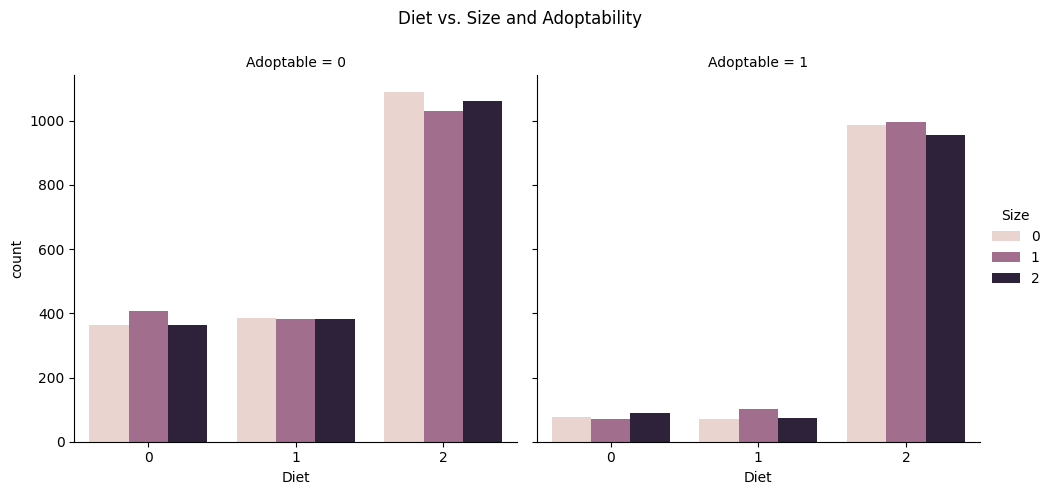

In [68]:
import seaborn as sns

sns.catplot(data=df, x='Diet', hue='Size', col='Adoptable', kind='count')
plt.subplots_adjust(top=0.85)
plt.suptitle('Diet vs. Size and Adoptability')
plt.show()


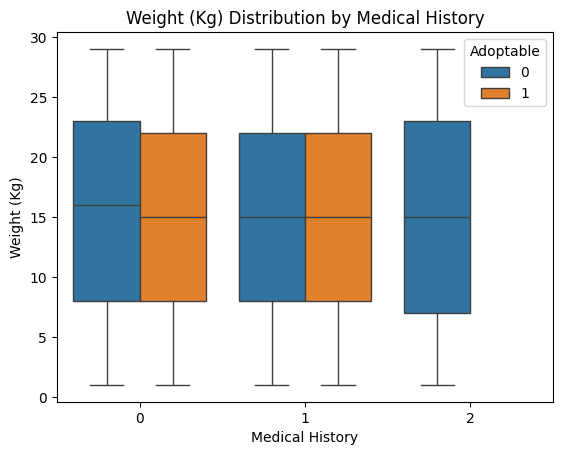

In [69]:
import seaborn as sns

sns.boxplot(data=df, x='Medical History', y='Weight (kg)', hue='Adoptable')
plt.title('Weight (Kg) Distribution by Medical History')
plt.xlabel('Medical History')
plt.ylabel('Weight (Kg)')
plt.show()


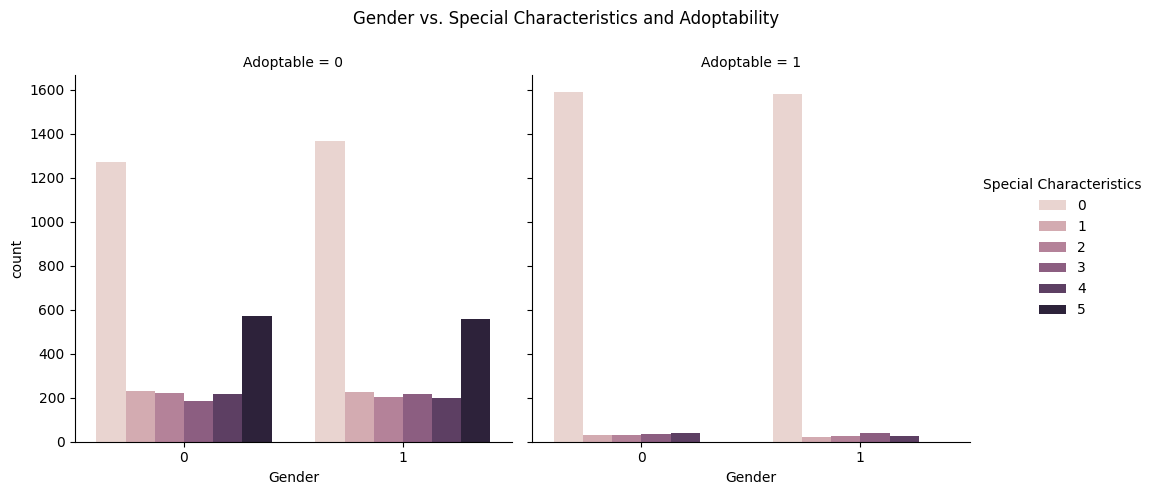

In [70]:
import seaborn as sns

sns.catplot(data=df, x='Gender', hue='Special Characteristics', col='Adoptable', kind='count')
plt.subplots_adjust(top=0.85)
plt.suptitle('Gender vs. Special Characteristics and Adoptability')
plt.show()


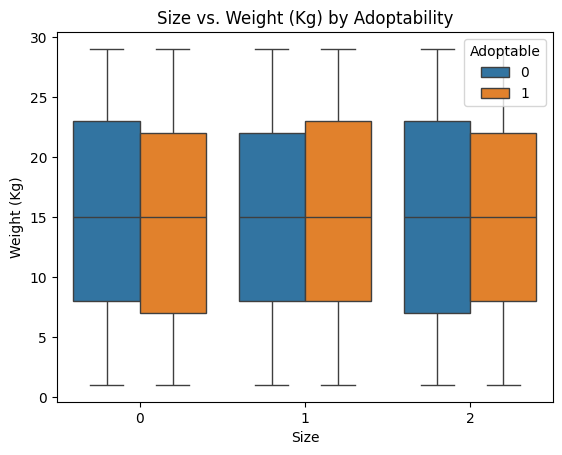

In [71]:
import seaborn as sns

sns.boxplot(data=df, x='Size', y='Weight (kg)', hue='Adoptable')
plt.title('Size vs. Weight (Kg) by Adoptability')
plt.xlabel('Size')
plt.ylabel('Weight (Kg)')
plt.show()


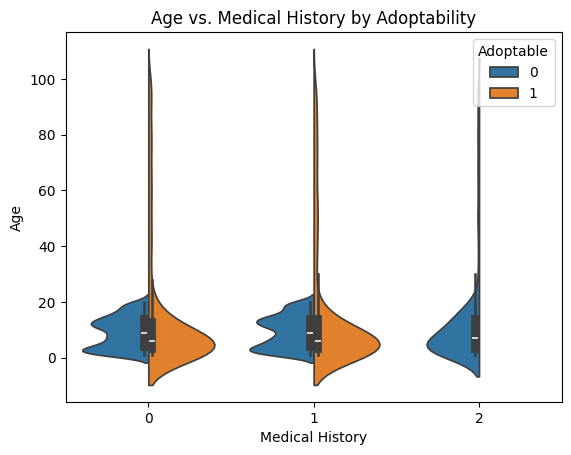

In [72]:
import seaborn as sns

sns.violinplot(data=df, x='Medical History', y='Age', hue='Adoptable', split=True)
plt.title('Age vs. Medical History by Adoptability')
plt.xlabel('Medical History')
plt.ylabel('Age')
plt.show()


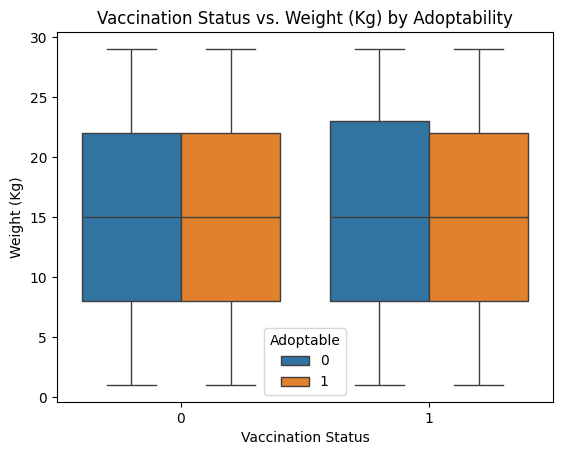

In [73]:
import seaborn as sns

sns.boxplot(data=df, x='Vaccination Status', y='Weight (kg)', hue='Adoptable')
plt.title('Vaccination Status vs. Weight (Kg) by Adoptability')
plt.xlabel('Vaccination Status')
plt.ylabel('Weight (Kg)')
plt.show()


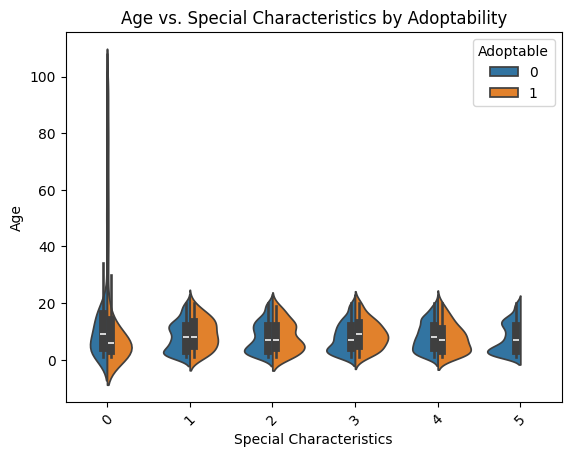

In [74]:
import seaborn as sns

sns.violinplot(data=df, x='Special Characteristics', y='Age', hue='Adoptable', split=True)
plt.title('Age vs. Special Characteristics by Adoptability')
plt.xlabel('Special Characteristics')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


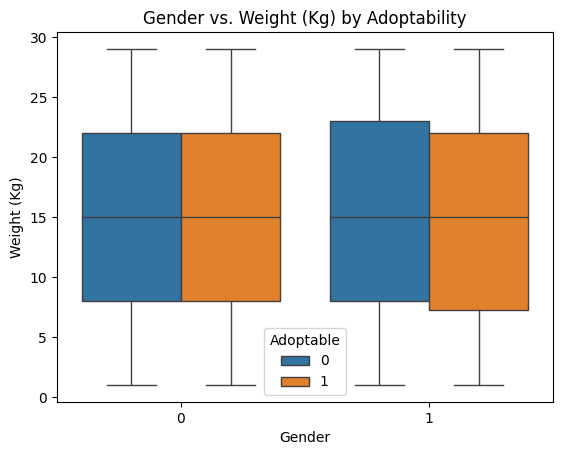

In [75]:
import seaborn as sns

sns.boxplot(data=df, x='Gender', y='Weight (kg)', hue='Adoptable')
plt.title('Gender vs. Weight (Kg) by Adoptability')
plt.xlabel('Gender')
plt.ylabel('Weight (Kg)')
plt.show()


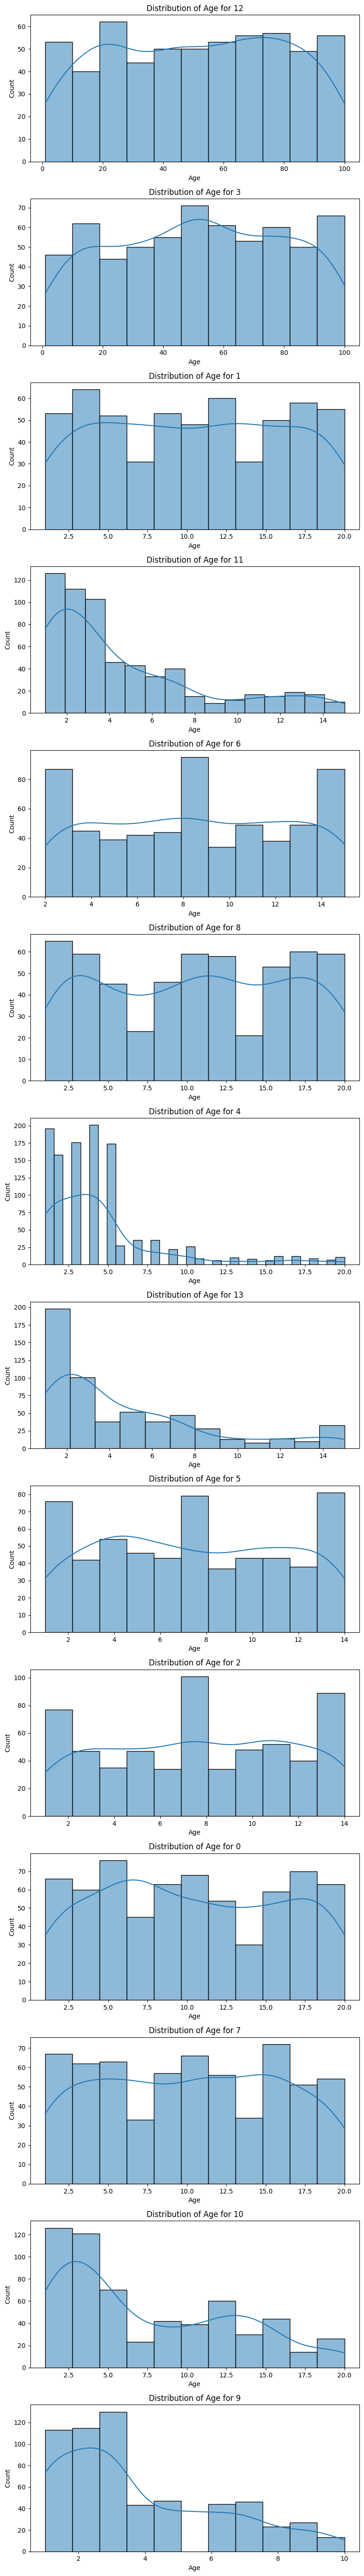

In [76]:
unique_pet_types = df['Pet Type'].unique()

# Create separate subplots for each pet type
fig, axes = plt.subplots(len(unique_pet_types), 1, figsize=(8, 4 * len(unique_pet_types)))

for i, pet_type in enumerate(unique_pet_types):
    subset = df[df['Pet Type'] == pet_type]
    ax = sns.histplot(data=subset, x='Age', kde=True, ax=axes[i])
    ax.set_title(f'Distribution of Age for {pet_type}')

plt.tight_layout()
plt.show()

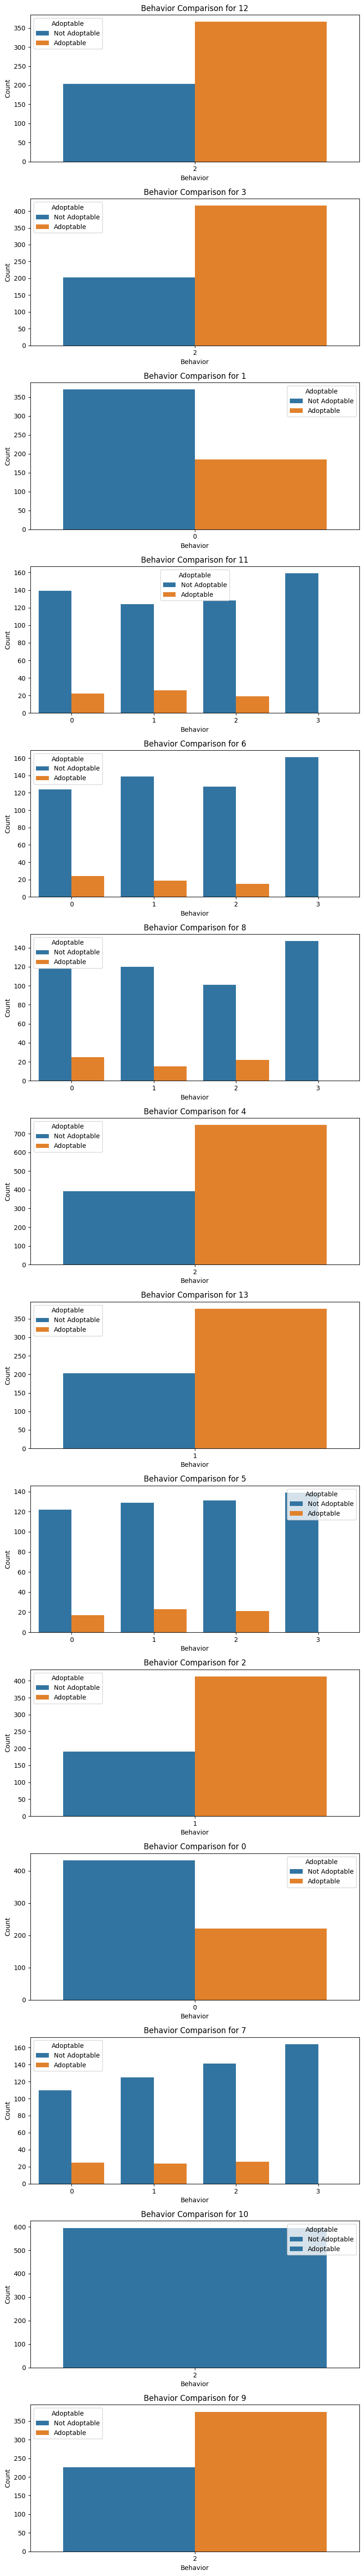

In [77]:
unique_pet_types = df['Pet Type'].unique()

# Create a subplots grid for behavior comparisons
fig, axes = plt.subplots(len(unique_pet_types), 1, figsize=(8, 4 * len(unique_pet_types)))

for i, pet_type in enumerate(unique_pet_types):
    subset = df[df['Pet Type'] == pet_type]
    ax = sns.countplot(data=subset, x='Behavior', hue='Adoptable', ax=axes[i])
    ax.set_title(f'Behavior Comparison for {pet_type}')
    ax.set_xlabel('Behavior')
    ax.set_ylabel('Count')
    ax.legend(title='Adoptable', labels=['Not Adoptable', 'Adoptable'])

plt.tight_layout()
plt.show()

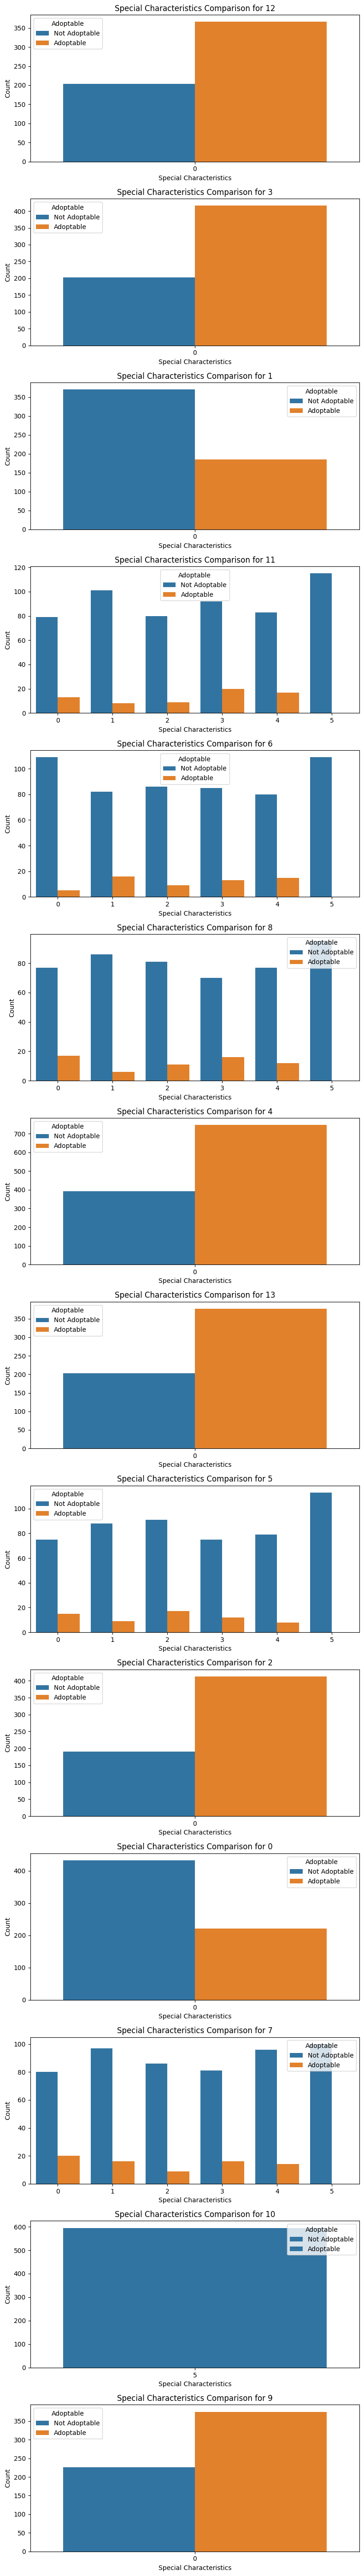

In [78]:
unique_pet_types = df['Pet Type'].unique()

# Create a subplots grid for special characteristics comparisons
fig, axes = plt.subplots(len(unique_pet_types), 1, figsize=(8, 4 * len(unique_pet_types)))

for i, pet_type in enumerate(unique_pet_types):
    subset = df[df['Pet Type'] == pet_type]
    ax = sns.countplot(data=subset, x='Special Characteristics', hue='Adoptable', ax=axes[i])
    ax.set_title(f'Special Characteristics Comparison for {pet_type}')
    ax.set_xlabel('Special Characteristics')
    ax.set_ylabel('Count')
    ax.legend(title='Adoptable', labels=['Not Adoptable', 'Adoptable'])

plt.tight_layout()
plt.show()

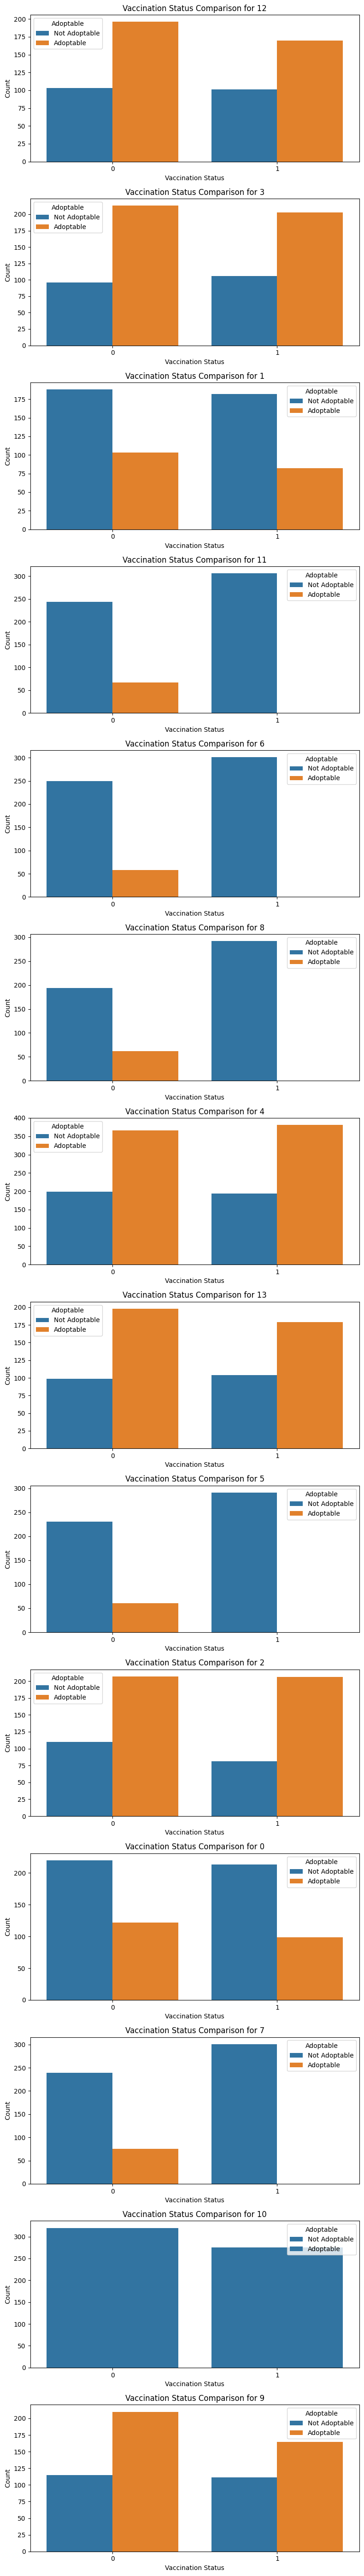

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of unique pet types in your dataset
unique_pet_types = df['Pet Type'].unique()

# Create a subplots grid for vaccination status comparisons
fig, axes = plt.subplots(len(unique_pet_types), 1, figsize=(8, 4 * len(unique_pet_types)))

for i, pet_type in enumerate(unique_pet_types):
    subset = df[df['Pet Type'] == pet_type]
    ax = sns.countplot(data=subset, x='Vaccination Status', hue='Adoptable', ax=axes[i])
    ax.set_title(f'Vaccination Status Comparison for {pet_type}')
    ax.set_xlabel('Vaccination Status')
    ax.set_ylabel('Count')
    ax.legend(title='Adoptable', labels=['Not Adoptable', 'Adoptable'])

plt.tight_layout()
plt.show()


C:\Users\haric\AppData\Local\Temp\ipykernel_8\3879010253.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Not Adoptable', 'Adoptable'])
C:\Users\haric\AppData\Local\Temp\ipykernel_8\3879010253.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Not Adoptable', 'Adoptable'])
C:\Users\haric\AppData\Local\Temp\ipykernel_8\3879010253.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Not Adoptable', 'Adoptable'])
C:\Users\haric\AppData\Local\Temp\ipykernel_8\3879010253.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Not Adoptable', 'Adoptable'])
C:\Users\haric\AppDa

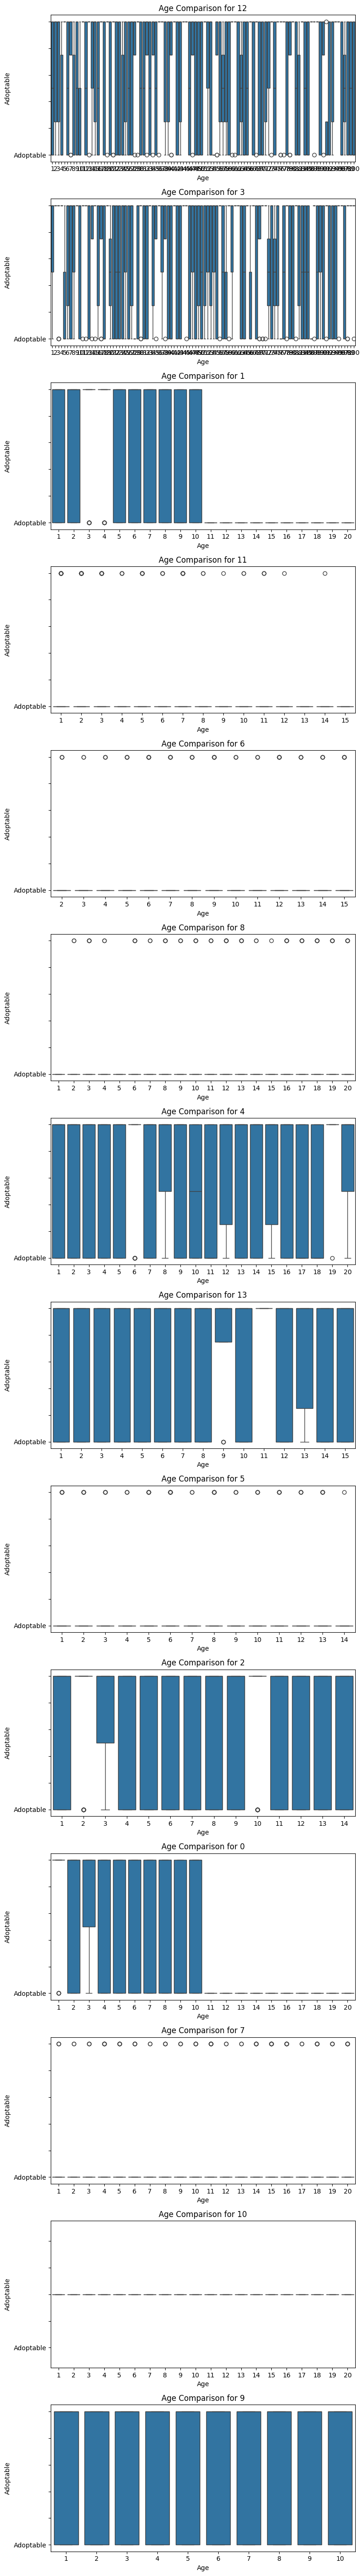

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplots grid for age comparisons
fig, axes = plt.subplots(len(unique_pet_types), 1, figsize=(8, 4 * len(unique_pet_types)))

for i, pet_type in enumerate(unique_pet_types):
    subset = df[df['Pet Type'] == pet_type]
    ax = sns.boxplot(data=subset, x='Age', y='Adoptable', ax=axes[i])
    ax.set_title(f'Age Comparison for {pet_type}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Adoptable')
    ax.set_yticklabels(['Not Adoptable', 'Adoptable'])

plt.tight_layout()
plt.show()


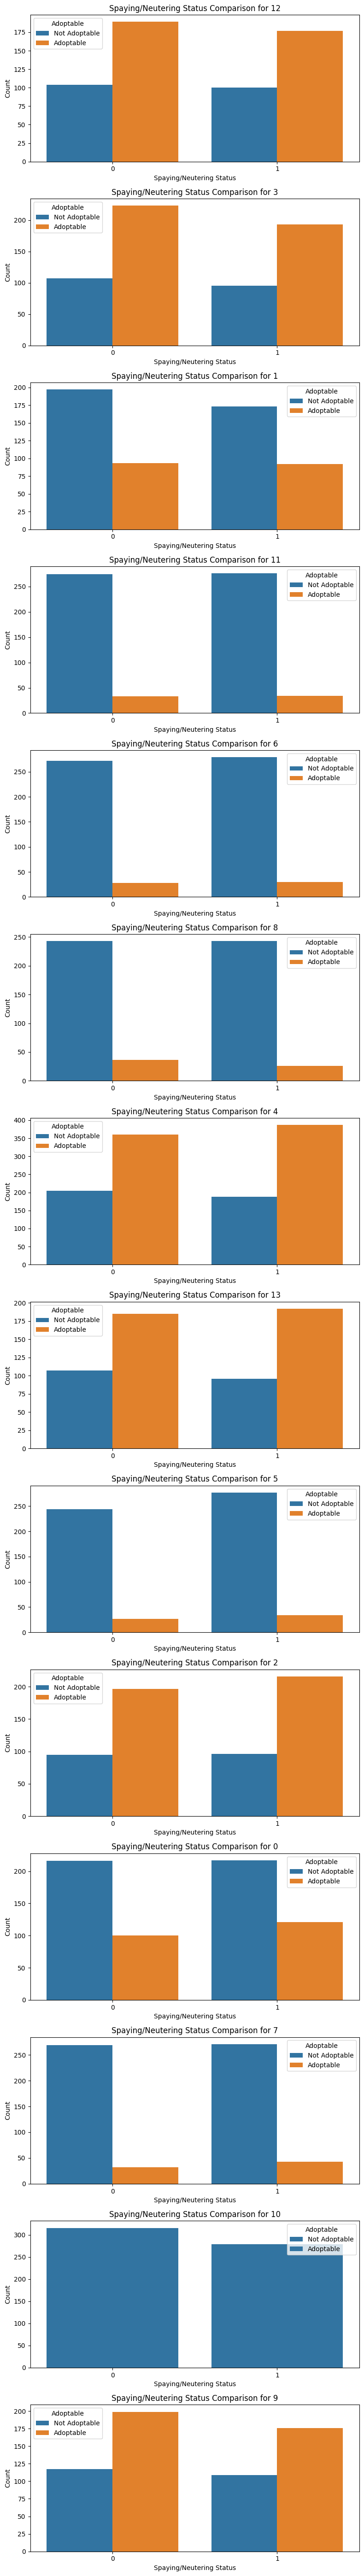

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplots grid for spaying/neutering status comparisons
fig, axes = plt.subplots(len(unique_pet_types), 1, figsize=(8, 4 * len(unique_pet_types)))

for i, pet_type in enumerate(unique_pet_types):
    subset = df[df['Pet Type'] == pet_type]
    ax = sns.countplot(data=subset, x='Spaying/Neutering Status', hue='Adoptable', ax=axes[i])
    ax.set_title(f'Spaying/Neutering Status Comparison for {pet_type}')
    ax.set_xlabel('Spaying/Neutering Status')
    ax.set_ylabel('Count')
    ax.legend(title='Adoptable', labels=['Not Adoptable', 'Adoptable'])

plt.tight_layout()
plt.show()


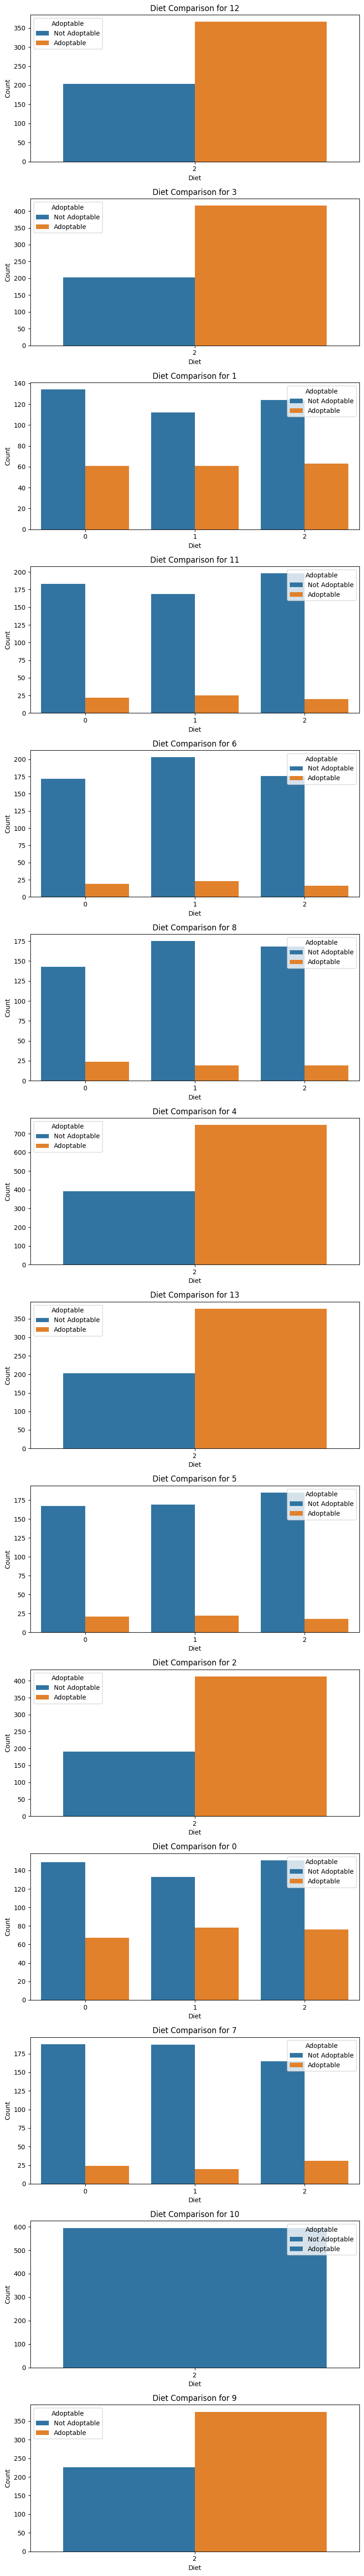

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplots grid for diet comparisons
fig, axes = plt.subplots(len(unique_pet_types), 1, figsize=(8, 4 * len(unique_pet_types)))

for i, pet_type in enumerate(unique_pet_types):
    subset = df[df['Pet Type'] == pet_type]
    ax = sns.countplot(data=subset, x='Diet', hue='Adoptable', ax=axes[i])
    ax.set_title(f'Diet Comparison for {pet_type}')
    ax.set_xlabel('Diet')
    ax.set_ylabel('Count')
    ax.legend(title='Adoptable', labels=['Not Adoptable', 'Adoptable'])

plt.tight_layout()
plt.show()


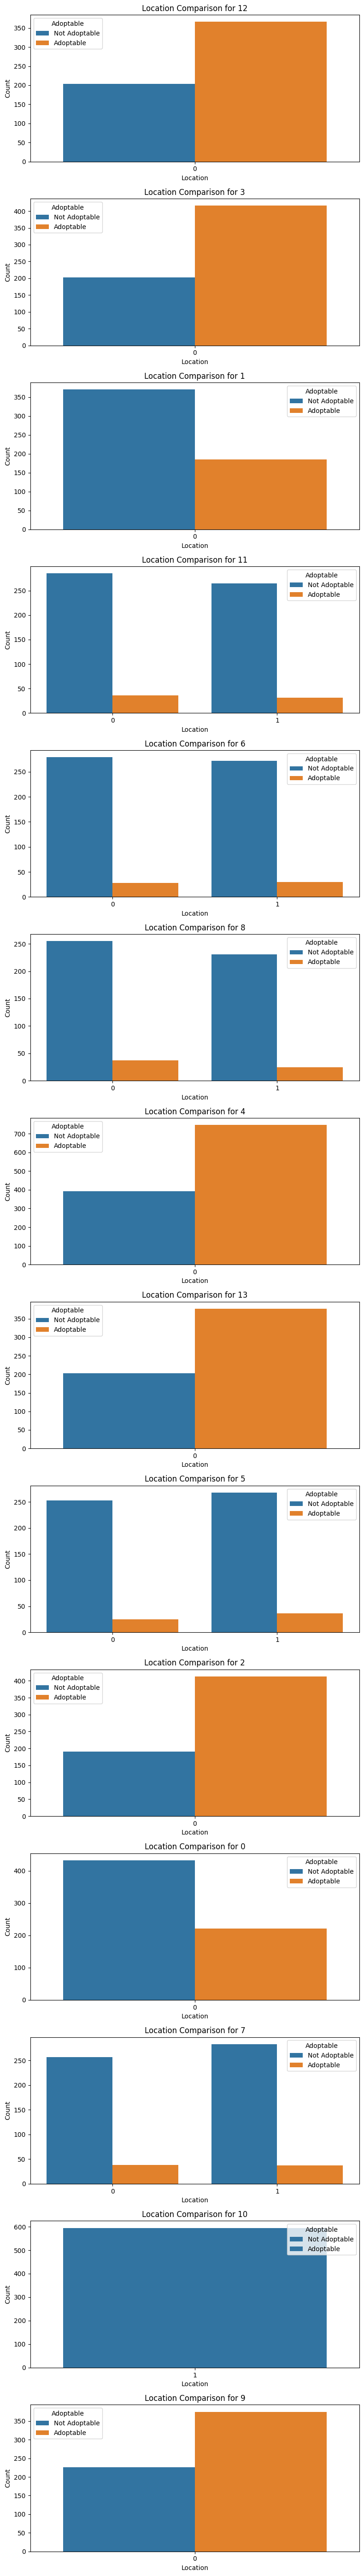

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplots grid for location comparisons
fig, axes = plt.subplots(len(unique_pet_types), 1, figsize=(8, 4 * len(unique_pet_types)))

for i, pet_type in enumerate(unique_pet_types):
    subset = df[df['Pet Type'] == pet_type]
    ax = sns.countplot(data=subset, x='Location', hue='Adoptable', ax=axes[i])
    ax.set_title(f'Location Comparison for {pet_type}')
    ax.set_xlabel('Location')
    ax.set_ylabel('Count')
    ax.legend(title='Adoptable', labels=['Not Adoptable', 'Adoptable'])

plt.tight_layout()
plt.show()


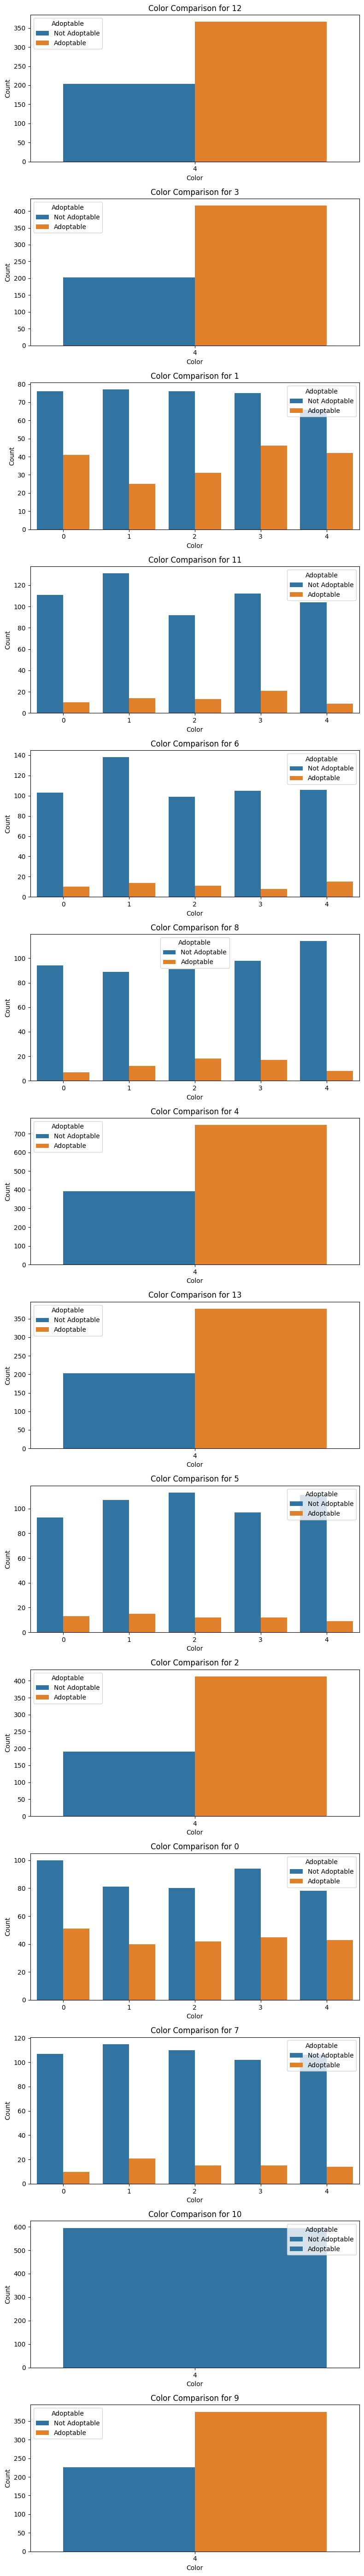

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplots grid for color comparisons
fig, axes = plt.subplots(len(unique_pet_types), 1, figsize=(8, 4 * len(unique_pet_types)))

for i, pet_type in enumerate(unique_pet_types):
    subset = df[df['Pet Type'] == pet_type]
    ax = sns.countplot(data=subset, x='Color', hue='Adoptable', ax=axes[i])
    ax.set_title(f'Color Comparison for {pet_type}')
    ax.set_xlabel('Color')
    ax.set_ylabel('Count')
    ax.legend(title='Adoptable', labels=['Not Adoptable', 'Adoptable'])

plt.tight_layout()
plt.show()


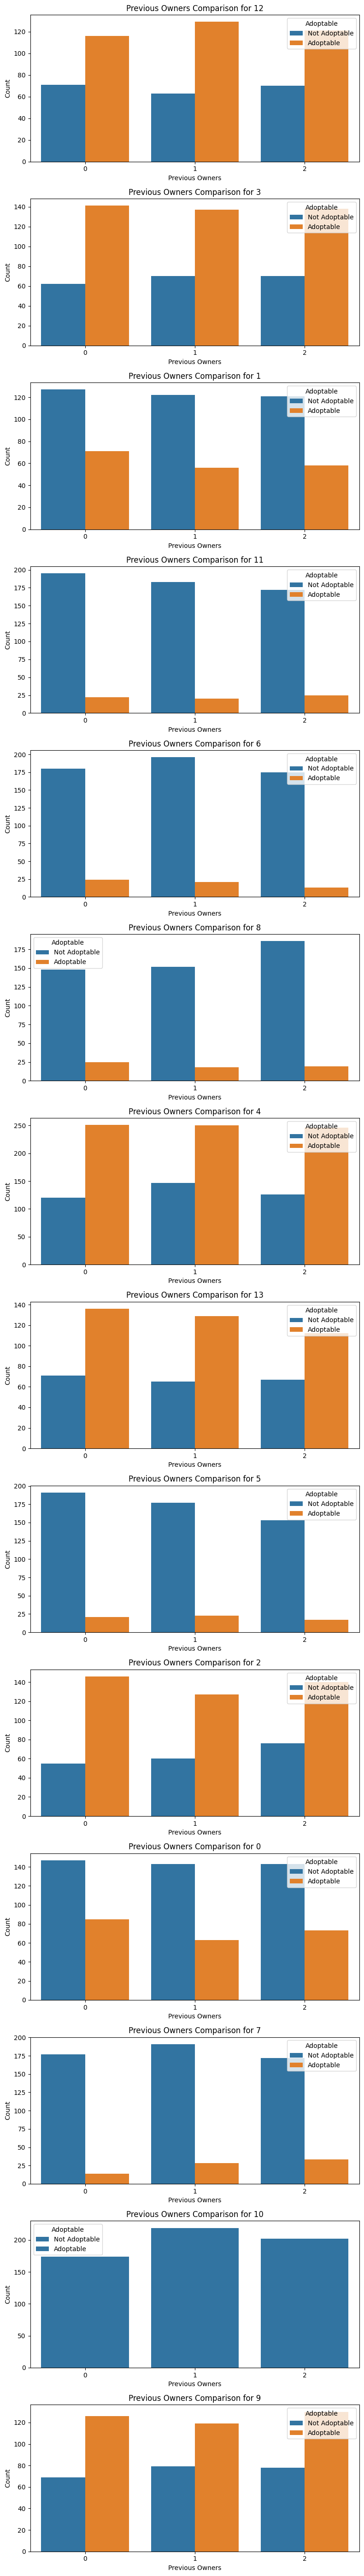

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplots grid for previous owners comparisons
fig, axes = plt.subplots(len(unique_pet_types), 1, figsize=(8, 4 * len(unique_pet_types)))

for i, pet_type in enumerate(unique_pet_types):
    subset = df[df['Pet Type'] == pet_type]
    ax = sns.countplot(data=subset, x='Previous Owners', hue='Adoptable', ax=axes[i])
    ax.set_title(f'Previous Owners Comparison for {pet_type}')
    ax.set_xlabel('Previous Owners')
    ax.set_ylabel('Count')
    ax.legend(title='Adoptable', labels=['Not Adoptable', 'Adoptable'])

plt.tight_layout()
plt.show()


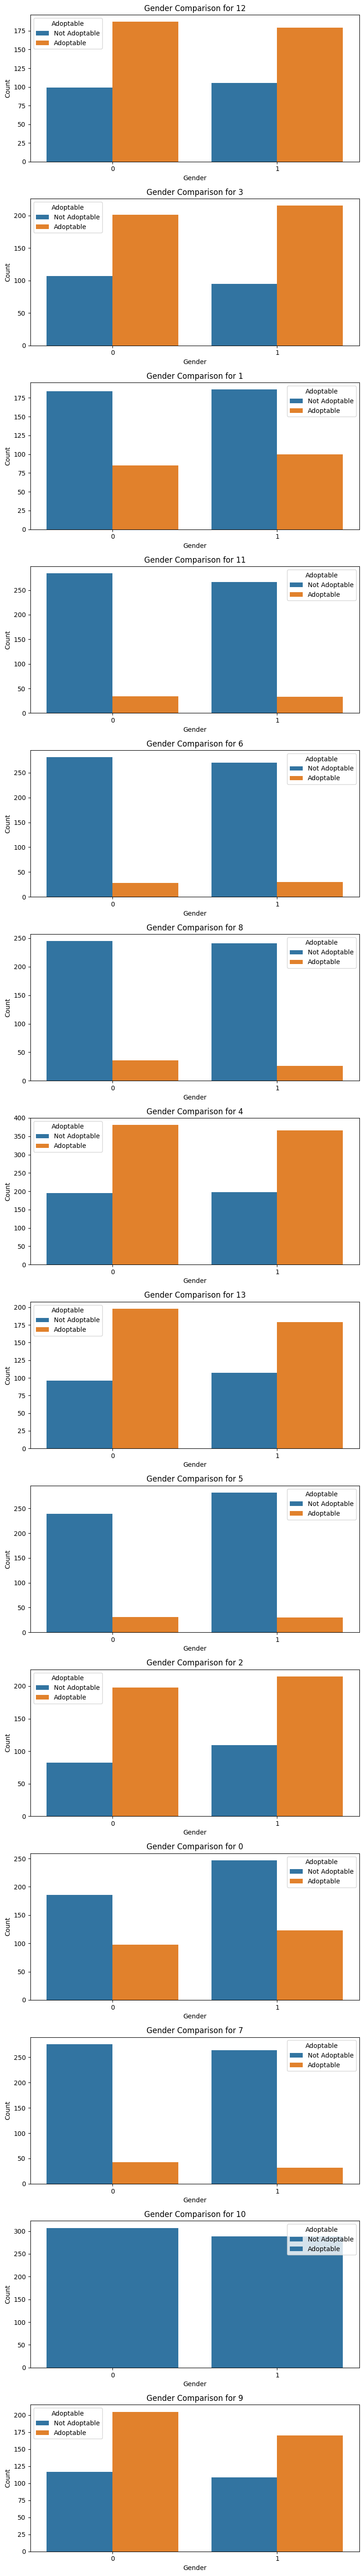

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplots grid for gender comparisons
fig, axes = plt.subplots(len(unique_pet_types), 1, figsize=(8, 4 * len(unique_pet_types)))

for i, pet_type in enumerate(unique_pet_types):
    subset = df[df['Pet Type'] == pet_type]
    ax = sns.countplot(data=subset, x='Gender', hue='Adoptable', ax=axes[i])
    ax.set_title(f'Gender Comparison for {pet_type}')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Count')
    ax.legend(title='Adoptable', labels=['Not Adoptable', 'Adoptable'])

plt.tight_layout()
plt.show()


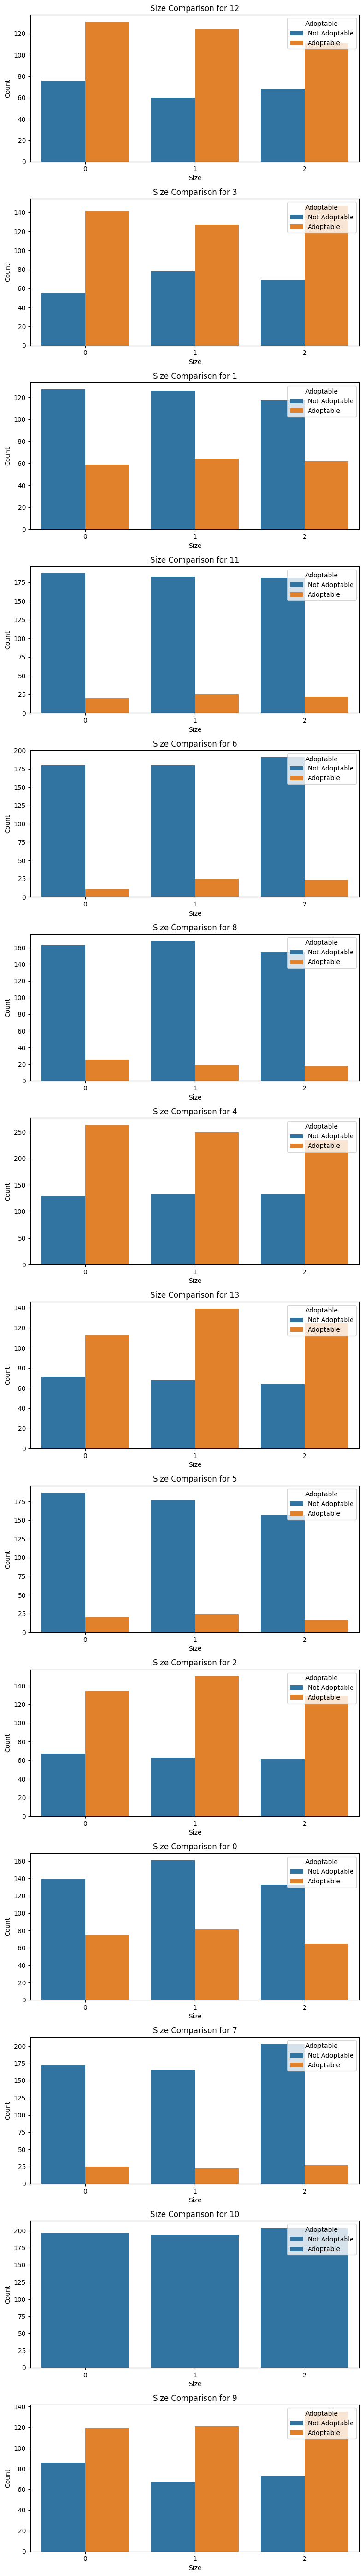

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplots grid for size comparisons
fig, axes = plt.subplots(len(unique_pet_types), 1, figsize=(8, 4 * len(unique_pet_types)))

for i, pet_type in enumerate(unique_pet_types):
    subset = df[df['Pet Type'] == pet_type]
    ax = sns.countplot(data=subset, x='Size', hue='Adoptable', ax=axes[i])
    ax.set_title(f'Size Comparison for {pet_type}')
    ax.set_xlabel('Size')
    ax.set_ylabel('Count')
    ax.legend(title='Adoptable', labels=['Not Adoptable', 'Adoptable'])

plt.tight_layout()
plt.show()


C:\Users\haric\AppData\Local\Temp\ipykernel_8\404284552.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\haric\AppData\Local\Temp\ipykernel_8\404284552.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\haric\AppData\Local\Temp\ipykernel_8\404284552.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\haric\AppData\Local\Temp\ipykernel_8\404284552.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\har

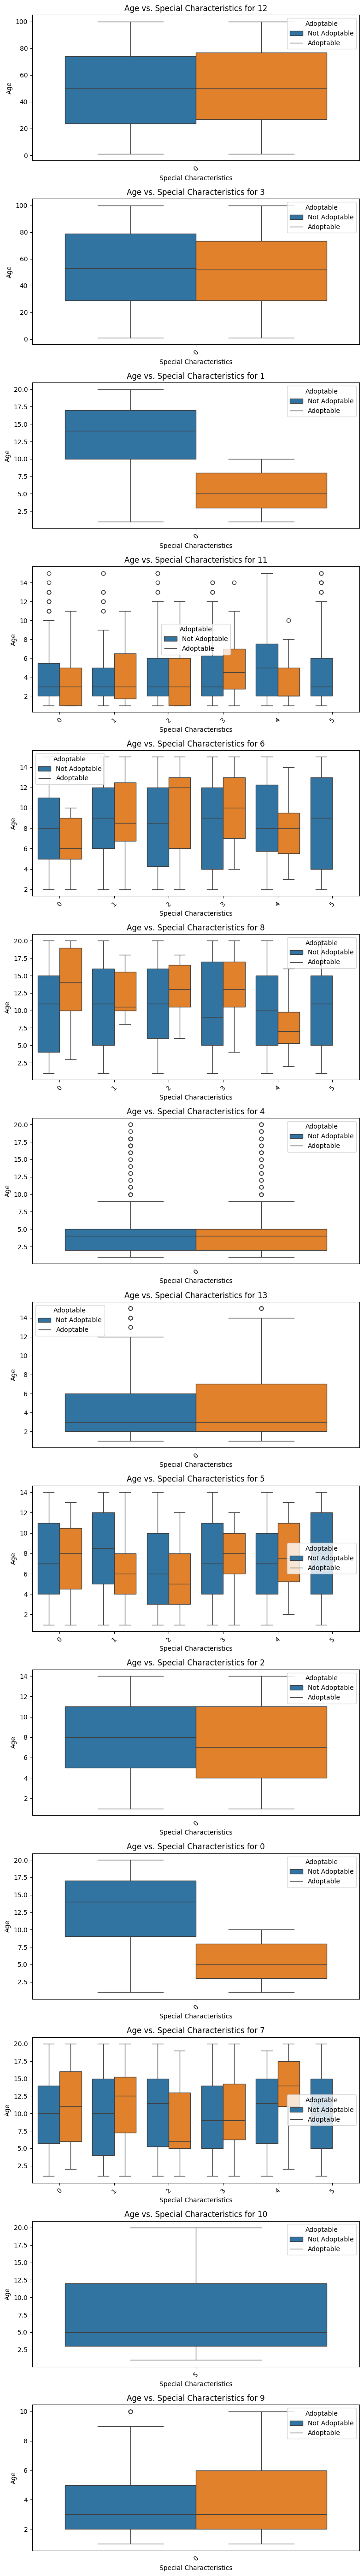

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplots grid for age vs. special characteristics comparisons
fig, axes = plt.subplots(len(unique_pet_types), 1, figsize=(8, 4 * len(unique_pet_types)))

for i, pet_type in enumerate(unique_pet_types):
    subset = df[df['Pet Type'] == pet_type]
    ax = sns.boxplot(data=subset, x='Special Characteristics', y='Age', hue='Adoptable', ax=axes[i])
    ax.set_title(f'Age vs. Special Characteristics for {pet_type}')
    ax.set_xlabel('Special Characteristics')
    ax.set_ylabel('Age')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.legend(title='Adoptable', labels=['Not Adoptable', 'Adoptable'])

plt.tight_layout()
plt.show()


C:\Users\haric\AppData\Local\Temp\ipykernel_8\701437889.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\haric\AppData\Local\Temp\ipykernel_8\701437889.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\haric\AppData\Local\Temp\ipykernel_8\701437889.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\haric\AppData\Local\Temp\ipykernel_8\701437889.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\har

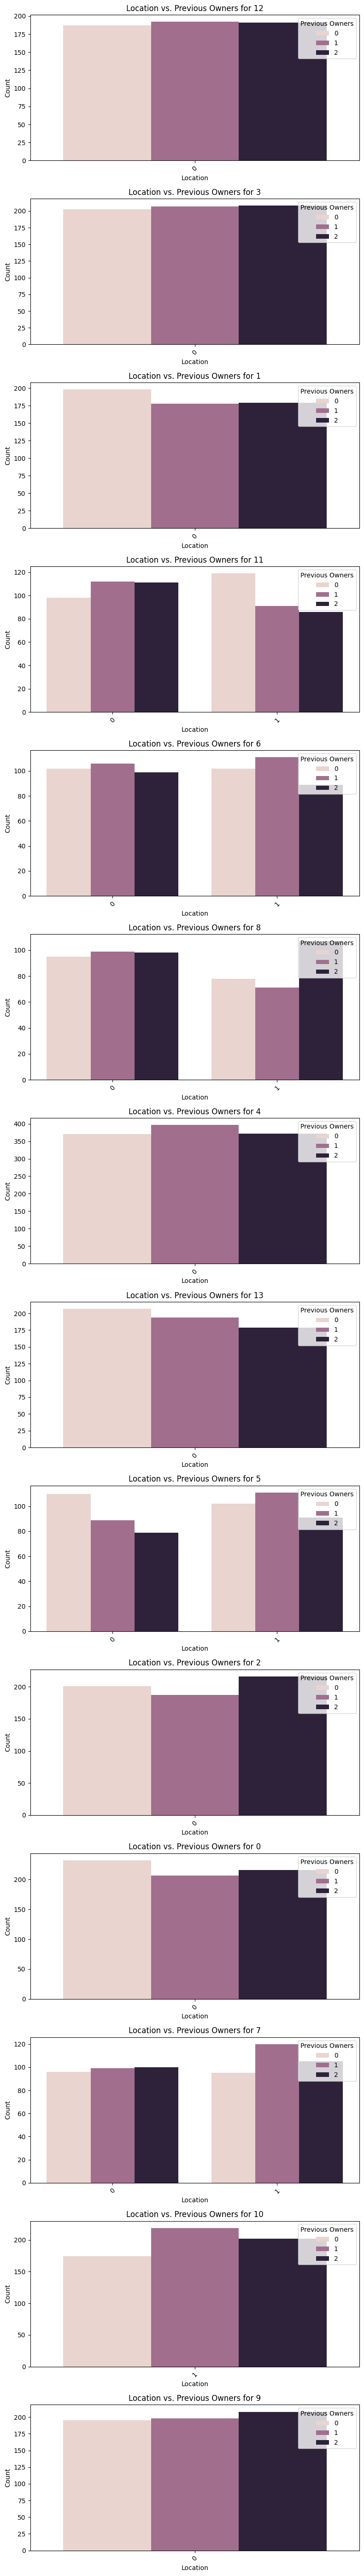

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplots grid for location vs. previous owners comparisons
fig, axes = plt.subplots(len(unique_pet_types), 1, figsize=(8, 4 * len(unique_pet_types)))

for i, pet_type in enumerate(unique_pet_types):
    subset = df[df['Pet Type'] == pet_type]
    ax = sns.countplot(data=subset, x='Location', hue='Previous Owners', ax=axes[i])
    ax.set_title(f'Location vs. Previous Owners for {pet_type}')
    ax.set_xlabel('Location')
    ax.set_ylabel('Count')
    ax.legend(title='Previous Owners')
    ax.legend(title='Previous Owners', loc='upper right', labels=['0', '1', '2'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


C:\Users\haric\AppData\Local\Temp\ipykernel_8\2294667005.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\haric\AppData\Local\Temp\ipykernel_8\2294667005.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\haric\AppData\Local\Temp\ipykernel_8\2294667005.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\haric\AppData\Local\Temp\ipykernel_8\2294667005.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users

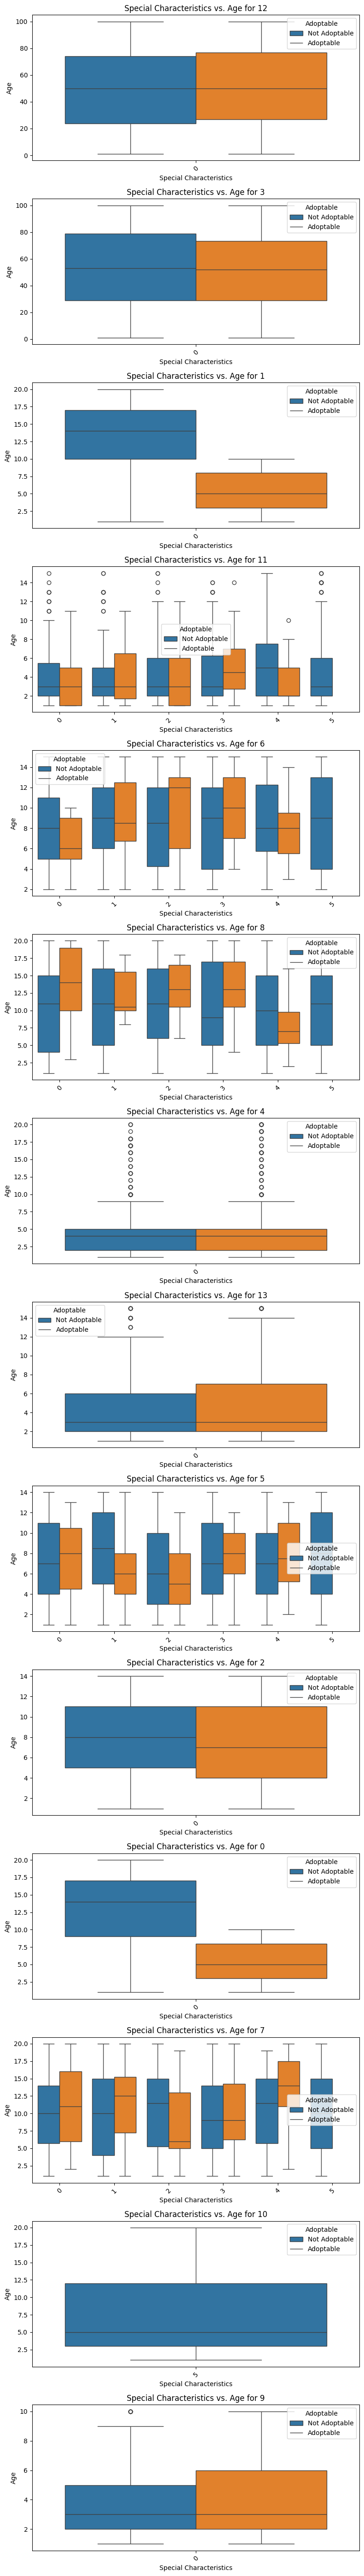

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplots grid for special characteristics vs. age comparisons
fig, axes = plt.subplots(len(unique_pet_types), 1, figsize=(8, 4 * len(unique_pet_types)))

for i, pet_type in enumerate(unique_pet_types):
    subset = df[df['Pet Type'] == pet_type]
    ax = sns.boxplot(data=subset, x='Special Characteristics', y='Age', hue='Adoptable', ax=axes[i])
    ax.set_title(f'Special Characteristics vs. Age for {pet_type}')
    ax.set_xlabel('Special Characteristics')
    ax.set_ylabel('Age')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.legend(title='Adoptable', labels=['Not Adoptable', 'Adoptable'])

plt.tight_layout()
plt.show()


C:\Users\haric\AppData\Local\Temp\ipykernel_8\332968885.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\haric\AppData\Local\Temp\ipykernel_8\332968885.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\haric\AppData\Local\Temp\ipykernel_8\332968885.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\haric\AppData\Local\Temp\ipykernel_8\332968885.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\har

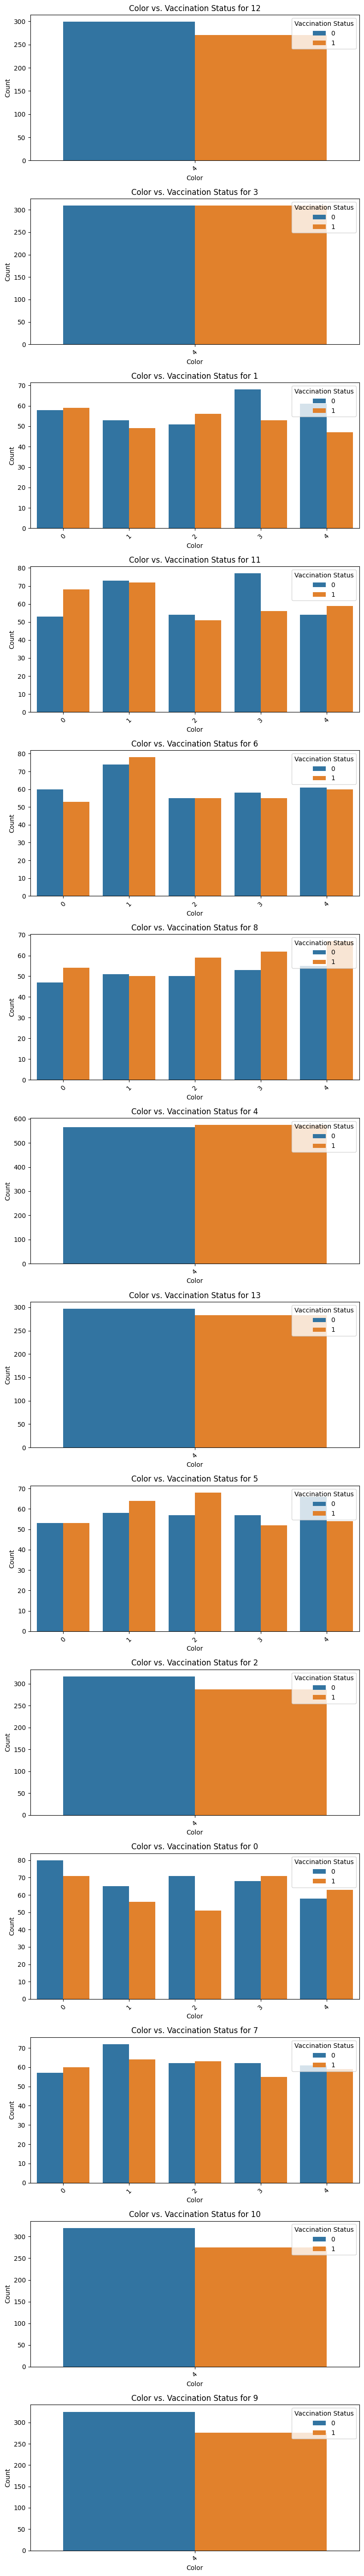

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplots grid for color vs. vaccination status comparisons
fig, axes = plt.subplots(len(unique_pet_types), 1, figsize=(8, 4 * len(unique_pet_types)))

for i, pet_type in enumerate(unique_pet_types):
    subset = df[df['Pet Type'] == pet_type]
    ax = sns.countplot(data=subset, x='Color', hue='Vaccination Status', ax=axes[i])
    ax.set_title(f'Color vs. Vaccination Status for {pet_type}')
    ax.set_xlabel('Color')
    ax.set_ylabel('Count')
    ax.legend(title='Vaccination Status', loc='upper right')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
df

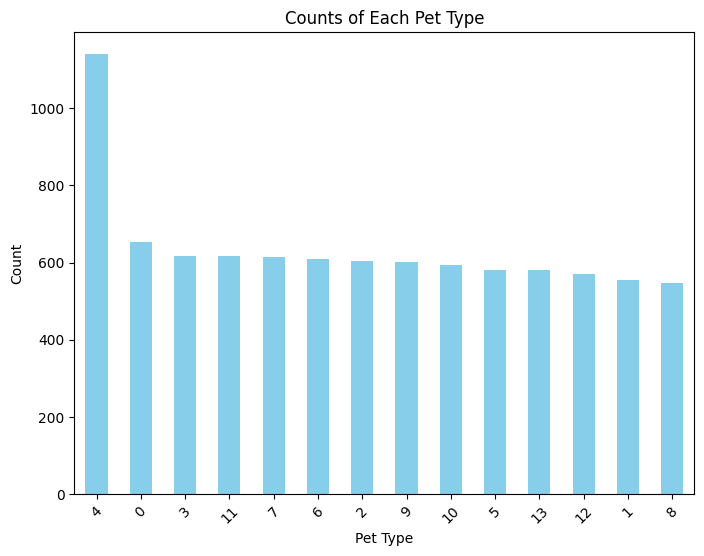

Pet Type
4     1140
0      654
3      618
11     617
7      615
6      609
2      604
9      601
10     595
5      582
13     580
12     570
1      555
8      548
Name: count, dtype: int64


In [96]:
import matplotlib.pyplot as plt
pet_counts = df['Pet Type'].value_counts()

# Plot the results
plt.figure(figsize=(8, 6))
pet_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Each Pet Type')
plt.xlabel('Pet Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print(pet_counts)

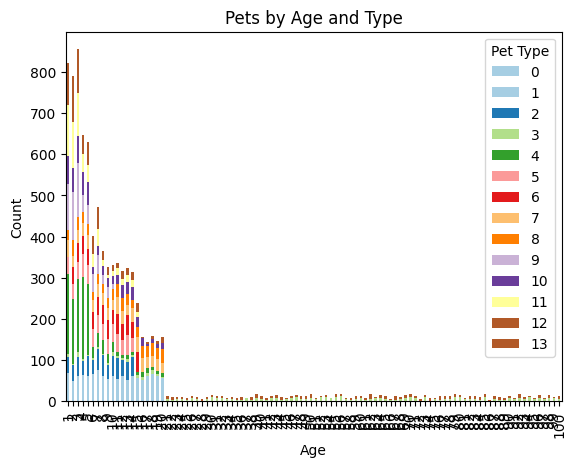

Pet Type  0   1   2   3    4   5   6   7   8    9   10   11  12   13
Age                                                                 
1         34  35  38   7  196  40   0  41  24  113  67  126   8   92
2         32  18  39   1  158  36  42  26  41  115  59  112   6  106
3         31  30  47  13  176  42  45  31  33  130  67  103   6  101
4         29  34  35   4  201  54  45  31  26   43  54   46   6   38
5         37  25  47   3  174  46  39  34  26   47  54   43   3   52
..        ..  ..  ..  ..  ...  ..  ..  ..  ..  ...  ..  ...  ..  ...
96         0   0   0   7    0   0   0   0   0    0   0    0   8    0
97         0   0   0   5    0   0   0   0   0    0   0    0   2    0
98         0   0   0   9    0   0   0   0   0    0   0    0   7    0
99         0   0   0   7    0   0   0   0   0    0   0    0   4    0
100        0   0   0   6    0   0   0   0   0    0   0    0   7    0

[100 rows x 14 columns]


In [97]:
pet_counts = df.groupby(['Age', 'Pet Type']).size().unstack(fill_value=0)

# Plot the results as a multiplot
pet_counts.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Pets by Age and Type')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Pet Type')
plt.show()

print(pet_counts)

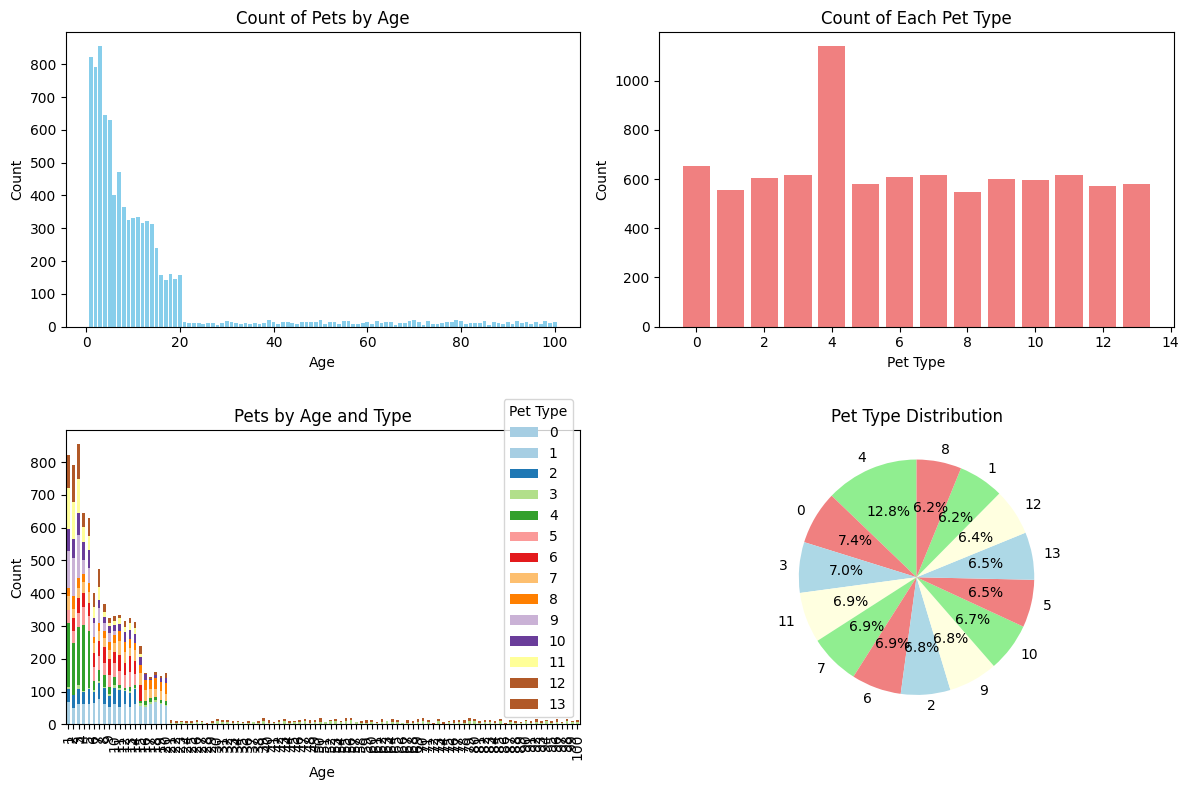

In [98]:
# Plot 1: Count of pets by age
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
pet_counts_age = df['Age'].value_counts().sort_index()
axes[0, 0].bar(pet_counts_age.index, pet_counts_age.values, color='skyblue')
axes[0, 0].set_title('Count of Pets by Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Plot 2: Count of each pet type
pet_counts_type = df['Pet Type'].value_counts()
axes[0, 1].bar(pet_counts_type.index, pet_counts_type.values, color='lightcoral')
axes[0, 1].set_title('Count of Each Pet Type')
axes[0, 1].set_xlabel('Pet Type')
axes[0, 1].set_ylabel('Count')

# Plot 3: Stacked bar plot of pets by age and type
pet_counts = df.groupby(['Age', 'Pet Type']).size().unstack(fill_value=0)
pet_counts.plot(kind='bar', stacked=True, colormap='Paired', ax=axes[1, 0])
axes[1, 0].set_title('Pets by Age and Type')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Pet Type')

# Plot 4: Pie chart of pet type distribution
pet_type_distribution = df['Pet Type'].value_counts()
axes[1, 1].pie(pet_type_distribution, labels=pet_type_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral', 'lightblue', 'lightyellow'])
axes[1, 1].set_title('Pet Type Distribution')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

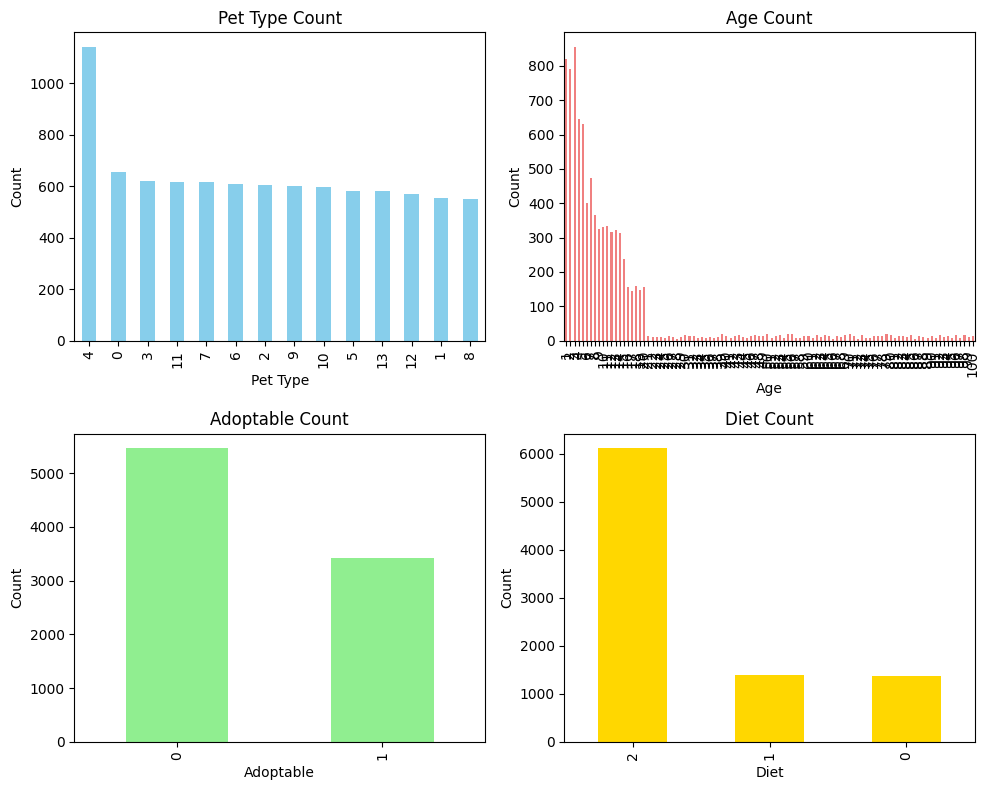

Pet Type Count:
 Pet Type
4     1140
0      654
3      618
11     617
7      615
6      609
2      604
9      601
10     595
5      582
13     580
12     570
1      555
8      548
Name: count, dtype: int64

Age Count:
 Age
1      821
2      791
3      855
4      646
5      630
      ... 
96      15
97       7
98      16
99      11
100     13
Name: count, Length: 100, dtype: int64

Adoptable Count:
 Adoptable
0    5465
1    3423
Name: count, dtype: int64

Diet Count:
 Diet
2    6118
1    1396
0    1374
Name: count, dtype: int64


In [99]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Pet Type Count
pet_counts = df['Pet Type'].value_counts()
pet_counts.plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Pet Type Count')
axes[0, 0].set_xlabel('Pet Type')
axes[0, 0].set_ylabel('Count')

# Age Count
age_counts = df['Age'].value_counts().sort_index()
age_counts.plot(kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Age Count')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')

# Adoptable Count
adoptable_counts = df['Adoptable'].value_counts()
adoptable_counts.plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Adoptable Count')
axes[1, 0].set_xlabel('Adoptable')
axes[1, 0].set_ylabel('Count')

# Diet Count
diet_counts = df['Diet'].value_counts()
diet_counts.plot(kind='bar', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Diet Count')
axes[1, 1].set_xlabel('Diet')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print("Pet Type Count:\n", pet_counts)
print("\nAge Count:\n", age_counts)
print("\nAdoptable Count:\n", adoptable_counts)
print("\nDiet Count:\n", diet_counts)

In [ ]:
df

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Split the dataset into features (X) and target (y)
X = df.drop('Adoptable', axis=1)
y = df['Adoptable']

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Logistic Regression model
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train)

# Make predictions on the test set for the Logistic Regression model
logistic_reg_predictions = logistic_reg_model.predict(X_test)

# Evaluate the accuracy of the Logistic Regression model
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_predictions)

# Print the accuracy of the Logistic Regression model
print(f'Logistic Regression Model Accuracy: {logistic_reg_accuracy:.2f}')

# Save the Logistic Regression model to a file
joblib.dump(logistic_reg_model, 'logistic_regression_model.pkl')


Logistic Regression Model Accuracy: 0.90


c:\Users\haric\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression_model.pkl']

In [101]:
# Define the input data as a dictionary
input_data = {
    'Pet Type': [0],
    'Age': [1],
    'Size': [1],
    'Gender': [1],
    'Vaccination Status': [1],
    'Spaying/Neutering Status': [1],
    'Behavior': [1],
    'Medical History': [1],
    'Location': [1],
    'Color': [1],
    'Weight (kg)': [1],
    'Special Characteristics': [1],
    'Previous Owners': [1],
    'Diet': [1],
    'Training Level': [1]
}

# Convert the input data into a DataFrame
import pandas as pd
input_df = pd.DataFrame(input_data)

# Load the saved Logistic Regression model
loaded_logistic_reg_model = joblib.load('logistic_regression_model.pkl')

# Make predictions on the input data using the model
predictions = loaded_logistic_reg_model.predict(input_df)

# Print the predictions (0 for not adoptable, 1 for adoptable)
print("Predictions:", predictions)
if predictions[0] == 0:
    print("The pet is not adaptable.")
else:
    print("The pet is adaptable.")


Predictions: [0]
The pet is not adaptable.
